Загружаем и импортируем необходимые библиоткеи

In [1]:
!pip install alphabet-detector
!pip install pytils

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from alphabet_detector import AlphabetDetector
import pytils.translit

In [3]:
# Настройка отображения всех колонок
pd.set_option('display.max_columns', None)

Считываение двух файлов :

    1. Данные за июль, август
    2. Данные за сентябрь, октябрь
Объединение их в единую таблицу

In [4]:
data_7_8 = '7_8.csv'
data_9_10 = '9_10.csv'
df_7_8 = pd.read_csv('/home/lilia/Desktop/diploma/Data/' + data_7_8, encoding='windows-1251', delimiter=';', parse_dates = ['Дата', 'ДатаДоставки', 
                                                                                            'ДатаЗаказаНаСайте', 'ГодДатыЗаказа'], decimal = ",")

df_9_10 = pd.read_csv('/home/lilia/Desktop/diploma/Data/' + data_9_10,  encoding='windows-1251', delimiter=';', parse_dates = ['Дата', 'ДатаДоставки', 
                                                                                            'ДатаЗаказаНаСайте', 'ГодДатыЗаказа'], decimal = ",")
df = pd.concat([df_7_8, df_9_10])

Пример данных, с которыми предстоит работать.

In [5]:
df.sample(5)

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
553629,2017-08-14 14:09:00,2017-08-20,5295453_TR,К отгрузке,8 817,6 414,Курьерская,Наличная,Москва,ДЕТСКОЕ ПИТАНИЕ,БАКАЛЕЯ,бакалея прочие,ППКП,"ФЛЁР АЛЬПИН, ЧАЙ травяной Органик Альпийский в...",МГТ,Нет,NaN,1,215,215,"153,07",8,2 017,NaN,Доставлен,Москва,"61,93",150,150,15,1,2017-08-14,55574954-48484956535072,101109_em18@gmail.com,Елена,ID10008804553,0,NaN
148780,2017-09-13 13:28:00,2017-09-20,5469867_TR,Доставлен,2 088,2 088,Магазины,Безналичная,Москва,ПОДГУЗНИКИ,ПОДГУЗНИКИ,трусики-подгузники,ППКП,"INSINSE, ТРУСИКИ-подгузники, (9-13кг), (58 шт)...",МГТ,Нет,NaN,1,838,838,762,9,2 017,23111,Доставлен,Москва,76,149,149,1,1,2017-09-13,55575054-53525257485677,98117_bu18@mail.ru,екатерина,IDL00042386755,0,NaN
119049,2017-11-07 14:23:00,2017-07-19,5098120_TR,Доставлен,937,937,Магазины,Безналичная,Уфа,ПОДГУЗНИКИ,ПОДГУЗНИКИ,трусики-подгузники,ППКП,"INSINSE, ТРУСИКИ-подгузники, (9-13кг), (58 шт)...",МГТ,Нет,NaN,1,838,838,762,7,2 017,23111,Доставлен,Регионы,76,99,99,1,1,2017-11-07,55575757-49515153484874,guest_103117_gu28@workmail.ru,Гость,IDL00042386755,0,NaN
304390,2017-09-24 15:31:00,2017-06-10,5571671_TR,Доставлен,1 598,1 598,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,КОНСТРУКТОРЫ,прочие конструкторы,ИГРУШКИ,"ЗНАТОК, КОНСТРУКТОР эл., Знаток, (180 схем)",МГТ,Нет,NaN,1,1 499,1 499,"1 328,25",9,2 017,23111,Доставлен,Регионы,"170,75",99,99,1,1,2017-09-24,55574950-57515750505776,100117_du20@mail.ru,Алексей,ID10001317048,0,NaN
698206,2017-08-24 08:59:00,2017-05-09,5370495_TR,Доставлен,3 698,3 698,Магазины,Безналичная,Самара,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,транспорт для малышей,ИГРУШКИ,"ИГРУША, СРЕДСТВО транспортное, (с 3-х лет)",МГТ,Нет,NaN,1,114,114,"70,26",8,2 017,23111,Доставлен,Регионы,"43,74",149,149,2,1,2017-08-24,55575055-48495253495679,103117_gu21@mail.ru,Гость,ID000so-2703250,0,NaN


In [6]:
df.shape

(1673267, 38)


Всего 1.673.267 записей и 38 колонок


# Описание колонок


Наименование колонки  | Суть
------------- | -------------
        Дата  |дата и время заказа на сайте
ДатаДоставки  | дата, на которую была заказана доствка
НомерЗаказаНаСайте|номер заказа на сайте
НовыйСтатус|статус заказа присвоенный после некоторого(?) действия
СуммаЗаказаНаСайте|сумма, которую заплатил покупатель на сайте
СуммаДокумента|фактическая сумма к оплате (есть ошибки)
МетодДоставки|метод, которым будет доставлен заказ
ФормаОплаты|метод оплаты покупателя
Регион|город, в который оформлена доставка
Группа2|категория товара
Группа3|более крутпная категория товара                                     
Группа4 | еще более крупная категория товара                         
Тип | основная категория товара                            
Номенклатура  | информация про бренд + доп. инф-ия                    
ТипТовара  | основная категория товара                       
Отменено  | был ли отменён заказ                       
ПричинаОтмены   | в чем причина отмены, если была отмена.                 
Количество  | количество купленных единиц товара
Цена  | цена по которой был куплен товар                            
СуммаСтроки | общая сумма, на которую был куплен товар (к примеру, если было куплено 2 единицы товара, то сумму строки = цена * 2_)                       
ЦенаЗакупки | цена, по которой закупался товар                    
МесяцДатыЗаказа   | в какой месяц был заказан товар                
ГодДатыЗаказа    | в какой год был заказан товар                
ПВЗ_код   | код пункта выдачи заказа, в который должен быть доставлен товар                       
Статус | статус заказа                          
Гео  | Москва, МО, Регионы                           
Маржа | маржа, которую получил магазин с данного товара                            
СуммаУслуг | сумма услуг в чеке                     
СуммаДоставки  | сколько заплатил человек за доставку                
НомерСтроки   | номер строки данного товара в чеке                 
КоличествоПроданоКлиенту  | сколько товара продано клиенту(т.е. сколько товаров выкупил человек)          
ДатаЗаказаНаСайте   | битое поле     
Телефон_new    | идентификатор человека, его зашифрованный телефонный номер                 
ЭлектроннаяПочта_new   | зашифрованная почта человека          
Клиент  | имя/фамилия клиента                        
ID_SKU  | уникальный идентификатор товара                          
ГородМагазина   | город магазина, в который заказан заказ               
МагазинЗаказа    | уникальный идентификатор магазина         
   

### Исследование отличия в знаечниях *СуммаДокумента* и *СуммаЗаказаНаСайте*

In [7]:
df[df['СуммаДокумента'] != df['СуммаЗаказаНаСайте']]['НомерЗаказаНаСайте'].unique()[:10]

array(['5031812_TR', '5031826_TR', '5031836_TR', '5031849_TR',
       '5031855_TR', '5031863_TR', '5031867_TR', '5031886_TR',
       '5031842_TR', '5031873_TR'], dtype=object)

In [8]:
df[df['НомерЗаказаНаСайте'] == '5031826_TR'][['СуммаЗаказаНаСайте', 'СуммаДокумента', 'Отменено', 'ПричинаОтмены', 'Количество', 'КоличествоПроданоКлиенту']]

,СуммаЗаказаНаСайте,СуммаДокумента,Отменено,ПричинаОтмены,Количество,КоличествоПроданоКлиенту
96,2 303,99,Нет,NaN,1,1
97,2 303,99,Да,1.5 Письмо об отмене,1,1
98,2 303,99,Да,1.5 Письмо об отмене,1,1
99,2 303,99,Да,1.5 Письмо об отмене,1,1
100,2 303,99,Да,1.5 Письмо об отмене,1,1
101,2 303,99,Да,1.5 Письмо об отмене,1,1
102,2 303,99,Да,1.5 Письмо об отмене,1,1
103,2 303,99,Да,1.5 Письмо об отмене,1,1


**Наблюдение 1.** В представленных данных есть случаи, когда товар отменен,но количество-продано-клиенту != 0. В примере выше количество-продано-клиену = 1.

**Наблюдение 2.** Так как доставка не была удалена -> *Сумма документа* = *сумма заказа* + *сумма доставки* = 0 + 99 = 99. Что в корне не верно.

In [9]:
# Информация по типу данных в таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1673267 entries, 0 to 876074
Data columns (total 38 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Дата                      1673267 non-null  datetime64[ns]
 1   ДатаДоставки              1672037 non-null  datetime64[ns]
 2   НомерЗаказаНаСайте        1673267 non-null  object        
 3   НовыйСтатус               1673267 non-null  object        
 4   СуммаЗаказаНаСайте        1673267 non-null  object        
 5   СуммаДокумента            1673267 non-null  object        
 6   МетодДоставки             1673153 non-null  object        
 7   ФормаОплаты               1673151 non-null  object        
 8   Регион                    1663422 non-null  object        
 9   Группа2                   1348144 non-null  object        
 10  Группа3                   1348144 non-null  object        
 11  Группа4                   1291998 non-null  object 

In [10]:
#Добавлем день даты доставки
df['ДеньДатыЗаказа'] = df['Дата'].dt.day
df['ЧасДатыЗаказа'] = df['Дата'].dt.hour
df['МесяцДатыЗаказа'] = df['Дата'].dt.month
df['ГодДатыЗаказа'] = df['Дата'].dt.year

df.head()

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа
0,2017-01-07,2017-06-07,5031788_TR,Доставлен,1 634,1 634,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,носки,ОДЕЖДА,"МАТЭКО, НОСКИ (зелен), р. 12-14",МГТ,Нет,NaN,1,50,50,"23,1",1,2017,901000646,Доставлен,Москва,"26,9",49,49,3,1,2017-06-30,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,IDL00051334048,0,NaN,7,0
1,2017-01-07,2017-06-07,5031788_TR,Доставлен,1 634,1 634,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,носки,ОДЕЖДА,"МАТЭКО, НОСКИ (т.син), р. 12-14",МГТ,Нет,NaN,1,50,50,"23,1",1,2017,901000646,Доставлен,Москва,"26,9",49,49,4,1,2017-06-30,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,IDL00051367351,0,NaN,7,0
2,2017-01-07,2017-06-07,5031788_TR,Доставлен,1 634,1 634,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,носки,ОДЕЖДА,"ЗАЙКА МОЯ, НОСКИ дет., р. 14",МГТ,Нет,NaN,1,49,49,"40,96",1,2017,901000646,Доставлен,Москва,"8,04",49,49,7,1,2017-06-30,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,IDL00007611755,0,NaN,7,0
3,2017-01-07,2017-06-07,5031788_TR,Доставлен,1 634,1 634,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,носки,ОДЕЖДА,"ЗАЙКА МОЯ, НОСКИ дет., р. 14",МГТ,Нет,NaN,1,40,40,"34,21",1,2017,901000646,Доставлен,Москва,"5,79",49,49,1,1,2017-06-30,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,IDL00014478250,0,NaN,7,0
4,2017-01-07,2017-06-07,5031788_TR,Доставлен,1 634,1 634,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,колготки,ОДЕЖДА,"ЗАЙКА МОЯ, КОЛГОТКИ дет., р. 92-98",МГТ,Нет,NaN,1,169,169,"105,21",1,2017,901000646,Доставлен,Москва,"63,79",49,49,9,1,2017-06-30,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,IDL00001209351,0,NaN,7,0


In [11]:
#Добавлем день даты заказа
df['ДеньДатыДоставки'] = df['ДатаДоставки'].dt.day
df['МесяцДатыДоставки'] = df['ДатаДоставки'].dt.month
df['ГодДатыДоставки'] = df['ДатаДоставки'].dt.year

df.head()

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,ДеньДатыДоставки,МесяцДатыДоставки,ГодДатыДоставки
0,2017-01-07,2017-06-07,5031788_TR,Доставлен,1 634,1 634,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,носки,ОДЕЖДА,"МАТЭКО, НОСКИ (зелен), р. 12-14",МГТ,Нет,NaN,1,50,50,"23,1",1,2017,901000646,Доставлен,Москва,"26,9",49,49,3,1,2017-06-30,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,IDL00051334048,0,NaN,7,0,7.0,6.0,2017.0
1,2017-01-07,2017-06-07,5031788_TR,Доставлен,1 634,1 634,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,носки,ОДЕЖДА,"МАТЭКО, НОСКИ (т.син), р. 12-14",МГТ,Нет,NaN,1,50,50,"23,1",1,2017,901000646,Доставлен,Москва,"26,9",49,49,4,1,2017-06-30,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,IDL00051367351,0,NaN,7,0,7.0,6.0,2017.0
2,2017-01-07,2017-06-07,5031788_TR,Доставлен,1 634,1 634,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,носки,ОДЕЖДА,"ЗАЙКА МОЯ, НОСКИ дет., р. 14",МГТ,Нет,NaN,1,49,49,"40,96",1,2017,901000646,Доставлен,Москва,"8,04",49,49,7,1,2017-06-30,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,IDL00007611755,0,NaN,7,0,7.0,6.0,2017.0
3,2017-01-07,2017-06-07,5031788_TR,Доставлен,1 634,1 634,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,носки,ОДЕЖДА,"ЗАЙКА МОЯ, НОСКИ дет., р. 14",МГТ,Нет,NaN,1,40,40,"34,21",1,2017,901000646,Доставлен,Москва,"5,79",49,49,1,1,2017-06-30,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,IDL00014478250,0,NaN,7,0,7.0,6.0,2017.0
4,2017-01-07,2017-06-07,5031788_TR,Доставлен,1 634,1 634,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,колготки,ОДЕЖДА,"ЗАЙКА МОЯ, КОЛГОТКИ дет., р. 92-98",МГТ,Нет,NaN,1,169,169,"105,21",1,2017,901000646,Доставлен,Москва,"63,79",49,49,9,1,2017-06-30,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,IDL00001209351,0,NaN,7,0,7.0,6.0,2017.0


# Выставляем колонки в логическом порядке

In [12]:
ordered_columns = [
    'НомерЗаказаНаСайте',
    'НовыйСтатус',
    #Инфо по заказу
    'СуммаЗаказаНаСайте','СуммаДокумента', 
    'Дата', 'ГодДатыЗаказа', 'МесяцДатыЗаказа', 'ДеньДатыЗаказа','ЧасДатыЗаказа',

    #инфо по доставке
    'ДатаДоставки', 'ГодДатыДоставки', 'МесяцДатыДоставки', 'ДеньДатыДоставки',
    'МетодДоставки',
    'ФормаОплаты',
    'Регион', 'Гео',
    #тип товара
    'ТипТовара','Тип','Группа2', 'Группа3','Группа4', 'Номенклатура','ID_SKU',

    #отмена
    'Отменено', 'ПричинаОтмены',
    'Количество', 'Цена', 'ЦенаЗакупки',
    
    'ПВЗ_код', 'Статус', 'Маржа',
    
    #Услуги
    'СуммаУслуг', 'СуммаДоставки',
    
    'НомерСтроки', 'КоличествоПроданоКлиенту',
    
    #инфо о клиенте
    'Телефон_new', 'ЭлектроннаяПочта_new', 'Клиент',
    
    #инфо по магазину
    'ГородМагазина', 'МагазинЗаказа'   
    
]

In [13]:
df = df[ordered_columns]

# Информация по колонкам

## Количество нулевых значений

In [14]:
df_info = pd.DataFrame(index = df.columns, columns=['NaN_number'])
for column in df.columns:
    df_info.loc[column]['NaN_number'] = df[column].isna().sum()
df_info.style.background_gradient(subset='NaN_number') 


,NaN_number
НомерЗаказаНаСайте,0
НовыйСтатус,0
СуммаЗаказаНаСайте,0
СуммаДокумента,0
Дата,0
ГодДатыЗаказа,0
МесяцДатыЗаказа,0
ДеньДатыЗаказа,0
ЧасДатыЗаказа,0
ДатаДоставки,1230


In [15]:
#Математические показатели
df.describe()

,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,ГодДатыДоставки,МесяцДатыДоставки,ДеньДатыДоставки,Количество,НомерСтроки,КоличествоПроданоКлиенту
count,1673267.0,1.673267e+06,1.673267e+06,1.673267e+06,1.672037e+06,1.672037e+06,1.672037e+06,1.673267e+06,1.673267e+06,1.673267e+06
mean,2017.0,7.872216e+00,1.667136e+01,1.494721e+01,2.017000e+03,7.821409e+00,1.713729e+01,1.392508e+00,4.995148e+00,1.257775e+00
std,0.0,2.480342e+00,7.674631e+00,5.539390e+00,1.968734e-01,2.542059e+00,7.634618e+00,2.200630e+00,7.436675e+00,2.112289e+00
min,2017.0,1.000000e+00,7.000000e+00,0.000000e+00,2.016000e+03,1.000000e+00,7.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2017.0,7.000000e+00,9.000000e+00,1.200000e+01,2.017000e+03,7.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00
50%,2017.0,8.000000e+00,1.600000e+01,1.600000e+01,2.017000e+03,8.000000e+00,1.600000e+01,1.000000e+00,2.000000e+00,1.000000e+00
75%,2017.0,1.000000e+01,2.300000e+01,1.900000e+01,2.017000e+03,1.000000e+01,2.400000e+01,1.000000e+00,6.000000e+00,1.000000e+00
max,2017.0,1.200000e+01,3.100000e+01,2.300000e+01,2.107000e+03,1.200000e+01,3.100000e+01,3.870000e+02,2.480000e+02,3.400000e+02


# Доставка

In [16]:
df['ГодДатыДоставки'].value_counts(dropna=False)

2017.0    1672022
NaN          1230
2107.0          8
2016.0          4
2018.0          3
Name: ГодДатыДоставки, dtype: int64

### нашли ошибку

1. меняем 2107 на 2017

In [17]:
df[df['ГодДатыДоставки'] == 2107] = 2017
df['ГодДатыДоставки'].value_counts(dropna=False)

2017.0    1672030
NaN          1230
2016.0          4
2018.0          3
Name: ГодДатыДоставки, dtype: int64

2. Убираем записи за 2016 и 2018 год

In [18]:
df = df[(df['ГодДатыДоставки'] != 2016) & (df['ГодДатыДоставки'] != 2018) ]


Узичаем записи, год доставки которых != 2017

In [19]:
df[df['ГодДатыДоставки'] != 2017]

,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,ДатаДоставки,ГодДатыДоставки,МесяцДатыДоставки,ДеньДатыДоставки,МетодДоставки,ФормаОплаты,Регион,Гео,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,ПВЗ_код,Статус,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,ЭлектроннаяПочта_new,Клиент,ГородМагазина,МагазинЗаказа
4064,2036000225_TR,Отменен,9 500,0,2017-01-07 17:04:00,2017,1,7,17,NaT,NaN,NaN,NaN,Магазины,Безналичная,NaN,Регионы,КГТ,КГТ,КРУПНОГАБАРИТНЫЙ ТОВАР,ДЕТСКИЕ СТУЛЬЯ ДЛЯ КОРМЛЕНИЯ,стулья для кормления пластик ЕВРОПА,"CHICCO, СТУЛЬЧИК Polly 2в1 Wood Friends",IDL00004672654,Да,1.3 Не верные контактные данные или нет связи ...,1,9 500,7 728,23111,Отменен,1 772,0,0,1,1,55535456-56505457565379,NaN,Хиросимашэст,Волгоград,STORE_121
5800,2062000074_TR,Отменен,3 450,0,2017-01-07 17:39:00,2017,1,7,17,NaT,NaN,NaN,NaN,Магазины,Безналичная,NaN,Регионы,КГТ,КГТ,КРУПНОГАБАРИТНЫЙ ТОВАР,"ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ",кровати,"SWEET BABY, КРОВАТЬ Mario, без ящика, (белое о...",IDL00050909250,Да,1.2 Повторный заказ (дубль заказа),1,3 450,2 846,23111,Отменен,604,0,0,1,0,55575650-49535454555776,NaN,Анискина,Нижневартовск,STORE_073
6067,1303000418_TR,Отменен,32 599,0,2017-01-07 17:39:00,2017,1,7,17,NaT,NaN,NaN,NaN,Магазины,Безналичная,NaN,Регионы,КГТ,КГТ,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КОЛЯСКИ ПОЛЬША,"АДАМЕКС, КОЛЯСКА з/л BARLETTA ECO 3 в 1, (кожа...",IDL00029177149,Да,5.1 Уже купил товар в другом месте,1,32 599,"18 500,65",23111,Отменен,"14 098,35",0,0,1,0,55575656-49514954485070,NaN,Белкова,Краснодар,STORE_111
6163,2061000091_TR,Отменен,3 199,0,2017-01-07 17:53:00,2017,1,7,17,NaT,NaN,NaN,NaN,Магазины,Безналичная,NaN,Регионы,КГТ,КГТ,КРУПНОГАБАРИТНЫЙ ТОВАР,ЭЛЕКТРОМОБИЛИ/МАШИНЫ ПЕДАЛЬНЫЕ,электромобили,"ВЕЙКЕСИ, Мотоцикл 3-6 лет, CH8819 (БЕЛЫЙ),акку...",IDL00038335654,Да,5.3 Другое,1,3 199,"1 750,33",901000646,Отменен,"1 448,67",0,0,1,0,55574954-52545557545176,NaN,Коняхин,Москва,STORE_021
6285,1989000787_TR,Отменен,5 649,0,2017-01-07 18:41:00,2017,1,7,18,NaT,NaN,NaN,NaN,Магазины,Безналичная,NaN,Регионы,КГТ,КГТ,КРУПНОГАБАРИТНЫЙ ТОВАР,"ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ",матрасы в кровать,МАТРАЦ Bony Кокос Бамбук,IDL00000795856,Да,1.3 Не верные контактные данные или нет связи ...,1,2 199,1 134,23111,Отменен,1 065,0,0,2,1,55575348-56525255544876,NaN,Терезникова,Ростов-на-Дону,STORE_013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870206,1865000656_TR,Отменен,40 118,0,2017-10-31 19:19:00,2017,10,31,19,NaT,NaN,NaN,NaN,Курьерская,Наличная,NaN,Регионы,КГТ,КГТ,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КОЛЯСКИ ПОЛЬША,"АДАМЕКС, КОЛЯСКА з/л BARLETTA NEW 3 в 1,(т.сер...",IDL00050253755,Да,1.3 Не верные контактные данные или нет связи ...,1,31 920,21 769,NaN,Отменен,10 151,0,0,1,1,55574954-56554950535471,NaN,Ирина,Москва,STORE_129
870207,1865000656_TR,Отменен,40 118,0,2017-10-31 19:19:00,2017,10,31,19,NaT,NaN,NaN,NaN,Курьерская,Наличная,NaN,Регионы,КГТ,КГТ,КРУПНОГАБАРИТНЫЙ ТОВАР,"ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ",кровати,"КРОВАТЬ дет. Алита, колесо-качалка, (бел)",ID9010025983957,Да,1.3 Не верные контактные данные или нет связи ...,1,4 999,2 900,NaN,Отменен,2 099,0,0,2,1,55574954-56554950535471,NaN,Ирина,Москва,STORE_129
870208,1865000656_TR,Отменен,40 118,0,2017-10-31 19:19:00,2017,10,31,19,NaT,NaN,NaN,NaN,Курьерская,Наличная,NaN,Регионы,КГТ,КГТ,КРУПНОГАБАРИТНЫЙ ТОВАР,"ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ",матрасы в кровать,"AFALINA, МАТРАЦ ЭКО, (120х60)",ID4076957,Да,1.3 Не верные контактные данные или нет связи ...,1,3 199,1 580,NaN,Отменен,1 619,0,0,3,1,55574954-56554950535471,NaN,Ирина,Москва,STORE_129
871093,2057000143_TR,Отменен,12 141,0,2017-10-31 20:20:00,2017,10,31,20,NaT,NaN,NaN,NaN,Магазины,Безналичная,NaN,Регионы,КГТ,КГТ,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КОЛЯСКИ ПОЛЬША,"EVERFLO, КОЛЯСКА прогулочная РР-04 

Наблюдаем много записей со статусом **отменен**.

*Предположение* : там, где заказ отменен - отсутсвует запись в доставке

In [20]:
df[df['ГодДатыДоставки'] != 2017]['НовыйСтатус'].value_counts()

Отменен      1221
В резерве       9
Name: НовыйСтатус, dtype: int64

**Вывод**

Дата доставки отсутствует тогда, когда статус заказа : 

    1. Отменен
    2. В Резерве

# Посмотрим в каких месяцах заказывали больше всего.

In [21]:
df['МесяцДатыЗаказа'].value_counts()

10      340248
8       309787
9       301283
7       281915
11       67616
12       60650
5        57457
4        55555
6        54872
3        51403
2        49473
1        42993
2017         8
Name: МесяцДатыЗаказа, dtype: int64

**Вывод**

Должны быть представлены данные за :

    1. июль
    2. август
    3. сентября
    4. октябрь
    
    + видимо опечатка 2017 + какие-то лишние месяцы -> ОШИБКА В ДАННЫХ

In [22]:
df[df['МесяцДатыЗаказа'] == 2017]

,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,ДатаДоставки,ГодДатыДоставки,МесяцДатыДоставки,ДеньДатыДоставки,МетодДоставки,ФормаОплаты,Регион,Гео,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,ПВЗ_код,Статус,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,ЭлектроннаяПочта_new,Клиент,ГородМагазина,МагазинЗаказа
68145,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017.0,2017.0,2017.0,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
68146,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017.0,2017.0,2017.0,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
614644,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017.0,2017.0,2017.0,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
614645,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017.0,2017.0,2017.0,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
619483,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017.0,2017.0,2017.0,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
619484,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017.0,2017.0,2017.0,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
644376,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017.0,2017.0,2017.0,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
644377,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017.0,2017.0,2017.0,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017


Данные, представленные выше, неверные. Их необходимо удалить.

In [23]:
df = df[df['МесяцДатыЗаказа'] != 2017]

# Посмотрим в какие дни заказывали больше всего.


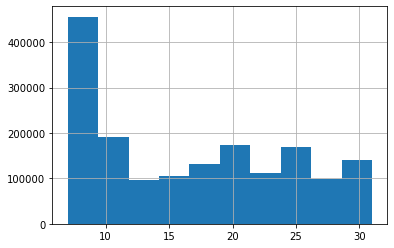

In [24]:
df['ДеньДатыЗаказа'].hist()
plt.show()

In [25]:
df['ДеньДатыЗаказа'].value_counts(dropna=False).reset_index().sort_values(by = 'index').style.background_gradient(subset='ДеньДатыЗаказа') 


,index,ДеньДатыЗаказа
2,7,148898
1,8,163990
3,9,143256
0,10,191121
16,13,50808
21,14,44803
12,15,54803
18,16,50196
6,17,65292
5,18,65704


Видим, что распределение по дням тоже неравномерное. К примеру, отсутствуют покупки в дни с 1 по 6 число каждого месяца.

Предполагаем, что в каких-то данных день-месяц поменят местями.

### Исправление очередности месяц - день

In [26]:
df.groupby(['МесяцДатыЗаказа', 'ДеньДатыЗаказа']).size()

МесяцДатыЗаказа  ДеньДатыЗаказа
1                7                  9689
                 8                 14759
                 9                  7474
                 10                11071
2                7                 10862
                                   ...  
11               10                22778
12               7                 17241
                 8                  8784
                 9                 18959
                 10                15666
Length: 123, dtype: int64

In [27]:
df['МесяцДатыЗаказа'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [28]:
mask_weired_month = (df['МесяцДатыЗаказа'] < 7) | (df['МесяцДатыЗаказа'] > 10)
df["МесяцДатыЗаказа"], df["ДеньДатыЗаказа"] = np.where(mask_weired_month, [df['ДеньДатыЗаказа'], df['МесяцДатыЗаказа']],[df['МесяцДатыЗаказа'], df['ДеньДатыЗаказа']] )


In [29]:
df['МесяцДатыЗаказа'].unique()

array([ 7,  8,  9, 10])

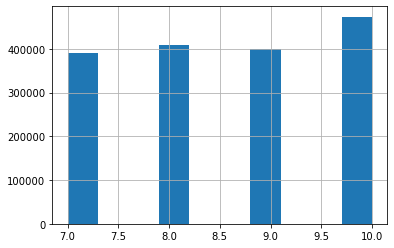

In [30]:
df['МесяцДатыЗаказа'].hist()
plt.show()

## Добавим колонку была ли совершена покупка в выходные

In [31]:
def set_weekday(x):
    day = x['Дата'].weekday()
    
    if(day == 1):
        return 'Понедельник'
    elif day == 2:
        return 'Вторник'
    elif day == 3:
        return 'Среда'
    elif day == 4:
        return 'Четверг'
    elif day == 5:
        return 'Пятница'
    elif day == 6:
        return 'Суббота'
    else:
        return 'Воскресенье'  

Замечательно, мы воостановили день-месяц!

Теперь осталось восстановить Дату. На данный момент дата имеет следующий формат год-день-месяц. Необходимо привести к год-месяц-день

In [32]:
df[['Дата', 'ДеньДатыЗаказа', 'МесяцДатыЗаказа']]

,Дата,ДеньДатыЗаказа,МесяцДатыЗаказа
0,2017-01-07 00:00:00,1,7
1,2017-01-07 00:00:00,1,7
2,2017-01-07 00:00:00,1,7
3,2017-01-07 00:00:00,1,7
4,2017-01-07 00:00:00,1,7
...,...,...,...
876070,2017-10-31 23:59:00,31,10
876071,2017-10-31 23:59:00,31,10
876072,2017-10-31 23:59:00,31,10
876073,2017-10-31 23:59:00,31,10


In [33]:
def create_date(x):
    y = x['ГодДатыЗаказа']
    m = x['МесяцДатыЗаказа']
    d = x['ДеньДатыЗаказа']
    date = datetime.datetime(year = y, month = m, day = d)
    return date

In [34]:
df['Дата'] = df.apply(create_date, axis=1)

In [35]:
df['День недели'] = df.apply(set_weekday, axis=1)

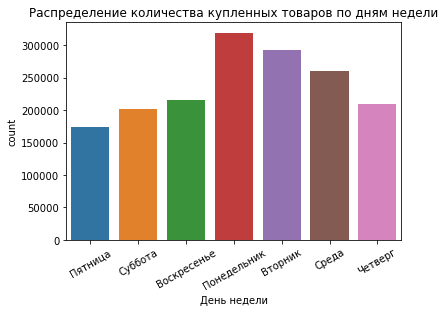

In [36]:
ax = sns.countplot(data = df, x = 'День недели')
ax.set_title('Распределение количества купленных товаров по дням недели')
ax.set_xticklabels(rotation=30, labels = ax.get_xticklabels());

# Метод Доставки

In [37]:
df['МетодДоставки'].value_counts()

Магазины                 1209655
Курьерская                407672
Pick point                 20847
Самовывоз                  20274
DPD                        13566
Транспортная компания       1124
Name: МетодДоставки, dtype: int64

### Группируем виды доставки

Объединяем Курьерская, Pick point, DPD, Транспортная компания в единую группу курьерской доставки

In [38]:
df['МетодДоставки'] = df.apply(lambda x: 'Курьерская' if x['МетодДоставки'] in('Pick point', 'DPD', 'Транспортная компания') else x['МетодДоставки'],
                               axis = 1 )

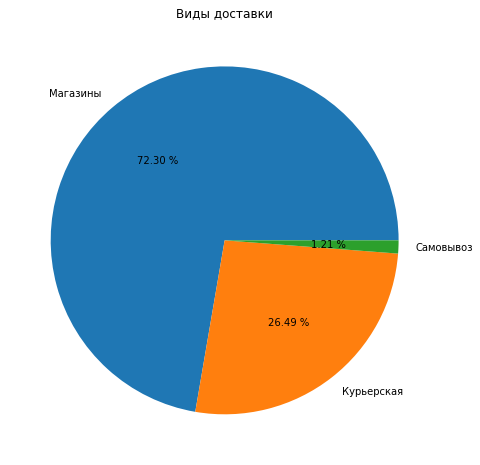

In [39]:
plt.figure(figsize=(10, 8))
plt.pie(df['МетодДоставки'].value_counts(), 
        labels = df['МетодДоставки'].value_counts().index,
                autopct='%.2f %%')

plt.title('Виды доставки')
plt.show()


# Дата Доставки

In [40]:
df['ГодДатыЗаказа'].value_counts(dropna=False)

2017    1673252
Name: ГодДатыЗаказа, dtype: int64

In [41]:
df['МесяцДатыДоставки'].value_counts(dropna=False).reset_index().sort_values(by = 'index')

,index,МесяцДатыДоставки
10,1.0,51758
8,2.0,52864
7,3.0,55436
6,4.0,55785
9,5.0,51801
11,6.0,46365
3,7.0,287572
1,8.0,304913
2,9.0,297890
0,10.0,340921


Nan - отмены

# Аномалия

Месяца доставки - везде разный, а месяц заказа только  7 и 8.

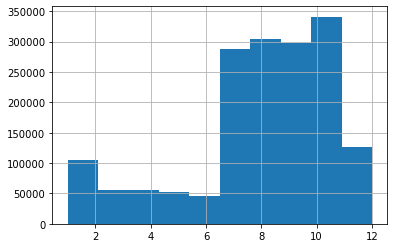

In [42]:
df['МесяцДатыДоставки'].hist()
plt.show()

Такая же ошибка в данных, как и дата заказа. Однако не будет изменять, так как эти данные не будут учитываться в последющем.

# Форма Оплаты

In [43]:
df['ФормаОплаты'].value_counts(dropna=False)

Безналичная    1245218
Наличная        427918
NaN                116
Name: ФормаОплаты, dtype: int64

In [44]:
df[df['ФормаОплаты'].isnull()]


,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,ДатаДоставки,ГодДатыДоставки,МесяцДатыДоставки,ДеньДатыДоставки,МетодДоставки,ФормаОплаты,Регион,Гео,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,ПВЗ_код,Статус,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,ЭлектроннаяПочта_new,Клиент,ГородМагазина,МагазинЗаказа,День недели
132749,5107879_ES,Отменен,760,760,2017-07-12,2017,7,12,2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Регионы,МГТ,ИГРУШКИ,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,"TOY TARGET, ИГРУШКА для ванны Рыбка",IDL00029521957,Да,5.3 Другое,1,760,547,NaN,Отменен,213,0,0,1,1,0,97117_au22@akanxcped.ru,0,0,NaN,Вторник
149720,5115727_ES,В резерве,1 311,1 311,2017-07-13,2017,7,13,2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Регионы,МГТ,ИГРУШКИ,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,куклы/пупсы,"REDWOOD, РУСАЛОЧКА танцующ. Белла",IDL00025079755,Нет,NaN,1,1 311,"938,08",NaN,В процессе,"372,92",0,0,1,1,0,97117_au21@aoffnchfa.ru,0,0,NaN,Среда
162417,5123143_ES,В резерве,1 301,1 301,2017-07-14,2017,7,14,2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Регионы,МГТ,ИГРУШКИ,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,"TOMY, ИГРУШКА для ванны Осьминожек",ID10019215351,Нет,NaN,1,1 301,1 043,NaN,В процессе,258,0,0,1,1,0,97117_au21@asbpbbou.ru,0,0,NaN,Четверг
171216,5130163_ES,В резерве,720,720,2017-07-15,2017,7,15,2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Регионы,МГТ,ИГРУШКИ,ИГРУШКИ,"ФИГУРЫ, ПЕРСОНАЖИ",мифические существа,"REDWOOD, АКУЛА-акробат Тигра, (12 см)",IDL00025077149,Нет,NaN,1,720,"520,21",NaN,В процессе,"199,79",0,0,1,1,0,97117_au23@acvrzwmtpih.ru,0,0,NaN,Пятница
178388,5134897_ES,В резерве,780,780,2017-07-16,2017,7,16,2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Регионы,МГТ,ИГРУШКИ,ИГРУШКИ,"ФИГУРЫ, ПЕРСОНАЖИ",мифические существа,"ROBOFISH, РОБОРЫБКА Немо",IDL00030637351,Нет,NaN,1,780,"557,76",NaN,В процессе,"222,24",0,0,1,1,0,97117_au26@aseidagngq.ru,0,0,NaN,Суббота
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806845,5953171_ES,Отменен,2 323,2 323,2017-10-27,2017,10,27,2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Регионы,МГТ,ИГРУШКИ,ИГРУШКИ,"ФИГУРЫ, ПЕРСОНАЖИ",животные,"HEXBUG, НАБОР Aqua Bot shark tank",IDL00037590452,Да,1.3 Не верные контактные данные или нет связи ...,1,2 323,1 790,NaN,Отменен,533,0,0,1,1,0,97117_au21@acltmcwtd.ru,0,0,NaN,Четверг
820771,5963887_ES,Отменен,990,990,2017-10-28,2017,10,28,2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Регионы,МГТ,ИГРУШКИ,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,"OBALL, ИГРУШКА для ванны Морские друзья",IDL00028059351,Да,1.3 Не верные контактные данные или нет связи ...,1,990,763,NaN,Отменен,227,0,0,1,1,0,97117_au25@ashnrsstkb.ru,0,0,NaN,Пятница
831081,5972239_ES,Отменен,1 371,1 371,2017-10-29,2017,10,29,2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Регионы,МГТ,ИГРУШКИ,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,"MUNCHKIN, ИГРУШКА для ванной Чайный сервиз, с ...",IDL00029351250,Да,1.3 Не верные контактные данные или нет связи ...,1,1 371,"982,83",NaN,Отменен,"388,17",0,0,1,1,0,97117_au23@axjjtgisef.ru,0,0,NaN,Суббота
844686,5983315_ES,Отменен,763,763,2017-10-30,2017,10,30,2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Регионы,МГТ,ИГРУШКИ,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,прочие игрушки для развития,"FISHER PRICE, ПИРАМИДКА для ванны Черепашка",IDL00035291957,Да,1.3 Не верные контактные данные или нет связи ...,1,763,"662,2",NaN,Отменен,"100,8",0,0,1,1,0,97117_au20@akpimxwv.ru,0,0,NaN,Воскресенье


Предположение - null в форме оплаты из-за Отмененных заказов/ заказов в резерве

In [45]:
df[df['ФормаОплаты'].isnull()]['НовыйСтатус'].value_counts()


Отменен      111
В резерве      5
Name: НовыйСтатус, dtype: int64

Предположение доказано.

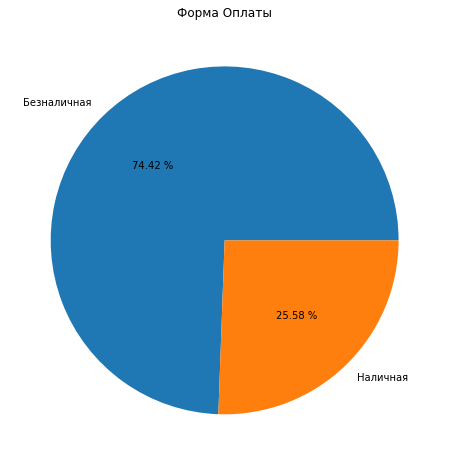

In [46]:
plt.figure(figsize=(10, 8))
plt.pie(df['ФормаОплаты'].value_counts(), 
        labels = df['ФормаОплаты'].value_counts().index,
                autopct='%.2f %%')

plt.title('Форма Оплаты')
plt.show()

# Регион и Город Мазаина

In [47]:
df['Регион'].value_counts(dropna=False).nlargest(5)

Москва                        728537
Санкт-Петербург               107819
Нижний Новгород                39946
Екатеринбург                   25620
Люберцы (Люберецкий район)     23154
Name: Регион, dtype: int64

In [48]:
df['Регион'].value_counts(dropna=False).nsmallest(5)

Дзержинского (Балашихинский район)         1
Солнечногорск-7 (Солнечногорский район)    1
Ямкино (Ногинский район)                   1
Редкино (Тверская область)                 2
Маркс                                      2
Name: Регион, dtype: int64

In [49]:
df[df['Регион'].isnull()][['ГородМагазина', 'Регион', 'Гео']]

,ГородМагазина,Регион,Гео
1784,Краснодар,NaN,Регионы
1785,Омск,NaN,Регионы
1786,Омск,NaN,Регионы
1787,Старый,NaN,Регионы
1788,Старый,NaN,Регионы
...,...,...,...
870207,Москва,NaN,Регионы
870208,Москва,NaN,Регионы
871092,Москва,NaN,Регионы
871093,Люберцы,NaN,Регионы


In [50]:
df[df['ГородМагазина'].isnull()][['ГородМагазина', 'Регион', 'Гео']]

,ГородМагазина,Регион,Гео


Город магазина указан везде.

In [51]:
temp = df[(df['ГородМагазина'].notna()) & (df['Регион'].notna())][['ГородМагазина', 'Регион', 'Гео']].drop_duplicates()
temp

,ГородМагазина,Регион,Гео
0,0,Москва,Москва
14,0,Сочи,Регионы
26,0,Самара,Регионы
35,0,Коломна (Московская область район),МО
39,0,Новомосковск,Регионы
...,...,...,...
849024,0,Высоковск (Клинский район),МО
849120,0,Питкяранта,Регионы
869295,0,Еремино-2 (Мытищинский район),МО
873708,0,Балабаново,Регионы


In [52]:
temp['ГородМагазина'].unique()

array(['0'], dtype=object)

Столбец *ГородМагазина* имеет самые полные данные по местополжению заказчика. Однако в некоторых местах *ГородМагазина* имеет значение 0.

Данные записи можно обогатить из столбца *Регион*.

In [53]:
town_0 = df.index[df['ГородМагазина'] == '0'].tolist()
print(len(town_0))
town_0[:10]

1663525


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [54]:
df.loc[town_0].sample(10)[['ГородМагазина', 'Регион', 'Гео']]

,ГородМагазина,Регион,Гео
121622,0,Электросталь (Московская область район),МО
339375,0,Москва,Москва
112525,0,Химки,Регионы
320076,0,Иркутск,Регионы
91799,0,Красногорск (Красногорский район),МО
813884,0,Москва,Москва
132195,0,Мытищи (Мытищинский район),МО
647516,0,Пермь,Регионы
279286,0,Набережные Челны,Регионы
451242,0,Санкт-Петербург,Регионы


In [55]:
df[(df['ГородМагазина'] == '0') & (df['Регион'].isna())][['ГородМагазина', 'Регион', 'Гео']]

,ГородМагазина,Регион,Гео
132749,0,NaN,Регионы
149720,0,NaN,Регионы
162417,0,NaN,Регионы
171216,0,NaN,Регионы
178388,0,NaN,Регионы
...,...,...,...
806845,0,NaN,Регионы
820771,0,NaN,Регионы
831081,0,NaN,Регионы
844686,0,NaN,Регионы


In [56]:
df_temp = df.copy()

In [57]:
df = df_temp.copy()

In [58]:
#Обогащение ГородМагазина, где ГородМагазина == 0  знаечнием из Регион
df.loc[town_0, 'ГородМагазина'] = df.loc[town_0].apply(lambda x: 
                                                       x['Регион'].split('(')[0].strip() 
                                                       if pd.notna(x['Регион']) 
                                                       else x['ГородМагазина'], axis = 1)

In [59]:
x = df.loc[town_0][['ГородМагазина', 'Регион']].drop_duplicates()
x

,ГородМагазина,Регион
0,Москва,Москва
4,Санкт-Петербург,Санкт-Петербург
9,Волгоград,Волгоград
13,Клин,Клин (Клинский район)
14,Сочи,Сочи
...,...,...
849024,Высоковск,Высоковск (Клинский район)
849120,Питкяранта,Питкяранта
869295,Еремино-2,Еремино-2 (Мытищинский район)
873708,Балабаново,Балабаново


In [60]:
x[x['Регион'].isna()]

,ГородМагазина,Регион
149,0,NaN
1880,Краснодар,NaN
1882,Москва,NaN
1883,Киров,NaN
1884,Ногинск,NaN
...,...,...
150436,Нижневартовск,NaN
437114,Люберцы,NaN
455028,"Жуковский,МТКлиник",NaN
557348,Владимир,NaN


In [61]:
def region(x):
    if pd.isna(x):
        return x
    arr = x.split('(')
    if len(arr) == 1:
        return arr[0].strip()
    else:
        return arr[1].strip(') ')

In [62]:
df['Регион'] = df['Регион'].apply(region)

In [63]:
df[df['ГородМагазина'].isnull()][['ГородМагазина', 'Регион', 'Гео']]

,ГородМагазина,Регион,Гео


In [64]:
df[df['Регион'].isnull()][['ГородМагазина', 'Регион', 'Гео']]

,ГородМагазина,Регион,Гео
1784,Краснодар,NaN,Регионы
1785,Омск,NaN,Регионы
1786,Омск,NaN,Регионы
1787,Старый,NaN,Регионы
1788,Старый,NaN,Регионы
...,...,...,...
870207,Москва,NaN,Регионы
870208,Москва,NaN,Регионы
871092,Москва,NaN,Регионы
871093,Люберцы,NaN,Регионы


## Обогощение данных о метсоположении РЕГИОНОМ

In [65]:
town_df = pd.read_excel('town_region.xlsx', sheet_name='население 2014')
town_df.drop(columns = ['Население 2014', 'Население в городе 2013'], inplace = True)
town_df.drop_duplicates().head()

,Регион,Субъект,Город
0,CENTRAL,Белгородская область,Алексеевка
1,CENTRAL,Белгородская область,Белгород
2,CENTRAL,Белгородская область,Валуйки
3,CENTRAL,Белгородская область,Губкин
4,CENTRAL,Белгородская область,Старый Оскол


In [66]:
df[~(df['ГородМагазина'].isin(town_df['Город']))]['Регион'].drop_duplicates()

433                           Орёл
1134           Волоколамский район
1423              Люберецкий район
1606           Воскресенский район
1787                           NaN
                    ...           
780556    Сергиево-Посадский район
782201                  Будённовск
818609                    Феодосия
849024              Клинский район
849120                  Питкяранта
Name: Регион, Length: 85, dtype: object

In [67]:
df[~(df['ГородМагазина'].isin(town_df['Город']))]['ГородМагазина'].drop_duplicates()

433                Орёл
1134            Внуково
1423           Марусино
1606       Белоозерский
1787             Старый
              ...      
848935      Березовский
849024        Высоковск
849120       Питкяранта
869295        Еремино-2
874457    дск Мичуринец
Name: ГородМагазина, Length: 280, dtype: object

In [68]:
# temp1 = pd.DataFrame(df[~(df['ГородМагазина'].isin(town_region_df['Город']))]['ГородМагазина'].unique())
# temp1.to_excel('temp_1.xlsx')

In [69]:
df[df['ГородМагазина'] == '0'][['НовыйСтатус', 'Статус', 'Гео', 'Телефон_new']].drop_duplicates()

,НовыйСтатус,Статус,Гео,Телефон_new
132749,Отменен,Отменен,Регионы,0
149720,В резерве,В процессе,Регионы,0
335361,Отменен,Отменен,Регионы,55574853-53555056565678


In [70]:
town_df.drop(columns = ['Субъект'], inplace = True)
town_df.set_index('Город', inplace=True)
town_df.rename(columns={'Регион':'Округ'}, inplace = True)
town_df

,Округ
Город,
Алексеевка,CENTRAL
Белгород,CENTRAL
Валуйки,CENTRAL
Губкин,CENTRAL
Старый Оскол,CENTRAL
...,...
Надым,URAL
Новый Уренгой,URAL
Ноябрьск,URAL


In [71]:
region_df = pd.read_excel('temp.xlsx', index_col=1)
region_df.drop(columns = ['Unnamed: 0'], inplace = True)
region_df

,Округ
Район,
Московская область район,CENTRAL
Люберецкий район,CENTRAL
Красногорский район,CENTRAL
Орёл,CENTRAL
Сергиево-Посадский район,CENTRAL
...,...
Любань,NORTH
Краснодарская область,SOUTHERN
Будённовск,NORTH


In [72]:
df = pd.merge(how = 'left', left=df, right=town_df, left_on = 'ГородМагазина', right_index=True)

In [73]:
df[df['Округ'].isna()][['ГородМагазина', 'Округ', 'Регион', 'Гео']].drop_duplicates()

,ГородМагазина,Округ,Регион,Гео
433,Орёл,NaN,Орёл,Регионы
1134,Внуково,NaN,Волоколамский район,МО
1423,Марусино,NaN,Люберецкий район,МО
1606,Белоозерский,NaN,Воскресенский район,МО
1787,Старый,NaN,NaN,Регионы
...,...,...,...,...
848935,Березовский,NaN,Свердловская область,Регионы
849024,Высоковск,NaN,Клинский район,МО
849120,Питкяранта,NaN,Питкяранта,Регионы
869295,Еремино-2,NaN,Мытищинский район,МО


In [74]:
df.loc[df['Округ'].isna(), 'Округ'] = df[df['Округ'].isna()].apply(lambda x: 
                                                                   region_df.loc[x['Регион']]
                                                                   if pd.notna(x['Регион'])
                                                                   else np.NaN,
                                                                   axis = 1)

In [75]:
df[df['Округ'].isna()][['ГородМагазина', 'Округ', 'Регион', 'Гео']].drop_duplicates()

,ГородМагазина,Округ,Регион,Гео
1787,Старый,NaN,NaN,Регионы
11854,Набережные,NaN,NaN,Регионы
12483,Нижний,NaN,NaN,Регионы
57485,Сергиев,NaN,NaN,Регионы
67573,Павловский,NaN,NaN,Регионы
132749,0,NaN,NaN,Регионы
777242,"Жуковский,МТКлиник",NaN,NaN,Регионы


In [76]:
df.loc[df['ГородМагазина'] == 'Старый', 'Округ'] = 'CENTRAL'
df.loc[df['ГородМагазина'] == 'Набережные', 'Округ'] = 'PRIVOLZIE'
df.loc[df['ГородМагазина'] == 'Нижний', 'Округ'] = 'PRIVOLZIE'
df.loc[df['ГородМагазина'] == 'Сергиев', 'Округ'] = 'CENTRAL'
df.loc[df['ГородМагазина'] == 'Павловский', 'Округ'] = 'CENTRAL'
df.loc[df['ГородМагазина'] == 'Жуковский,МТКлиник','Округ'] = 'CENTRAL'


In [77]:
df[df['Округ'].isna()][['ГородМагазина', 'Округ', 'Регион', 'Гео']].drop_duplicates()

,ГородМагазина,Округ,Регион,Гео
132749,0,NaN,NaN,Регионы


In [78]:
df['Округ'].unique()

array(['CENTRAL', 'SOUTHERN', 'PRIVOLZIE', 'URAL', 'NORTH', 'SIBERIA',
       'FAR EAST', nan], dtype=object)

1. Центр
2. Юг
3. Приволжье
4. Урал
5. Сервер
6. Сибирь
7. Дальный восток

# ТИП ТОВАРА

Изучаем описание товаров

# Тип товара

In [79]:
df['ТипТовара'].value_counts(dropna = False)

МГТ    1277299
NaN     325117
КГТ      70836
Name: ТипТовара, dtype: int64

## Есть ли возможность восстановить неизвестные ТипТовара по остальным данным о товаре?

см номенклатуру

In [80]:
df[df['ТипТовара'].isnull()][['ТипТовара','Тип', 'Группа4', 'Группа3', 'Группа2']]

,ТипТовара,Тип,Группа4,Группа3,Группа2
7,NaN,ИНОЕ,NaN,NaN,NaN
14,NaN,ИНОЕ,NaN,NaN,NaN
27,NaN,ИНОЕ,NaN,NaN,NaN
28,NaN,ИНОЕ,NaN,NaN,NaN
30,NaN,ИНОЕ,NaN,NaN,NaN
...,...,...,...,...,...
876043,NaN,ИНОЕ,NaN,NaN,NaN
876059,NaN,ИНОЕ,NaN,NaN,NaN
876061,NaN,ИНОЕ,NaN,NaN,NaN
876062,NaN,ИНОЕ,NaN,NaN,NaN


Нет возможности, так как это что-то иное.

Посмотрим есть ли типы товаров, тип которых NaN и не ИНОЕ

In [81]:
df[(df['ТипТовара'].isnull()) & (df['Тип'] != 'ИНОЕ')][['ТипТовара','Тип', 'Группа4', 'Группа3', 'Группа2']]

,ТипТовара,Тип,Группа4,Группа3,Группа2


Нет таких товаров, где ты был не известен ТипТовара и при этом Тип был бы не иное.

In [82]:
df['ТипТовара'].fillna('ИНОЕ', inplace=True)

In [83]:
df['ТипТовара'].value_counts(dropna = False)

МГТ     1277299
ИНОЕ     325117
КГТ       70836
Name: ТипТовара, dtype: int64

# Тип

In [84]:
df['Тип'].value_counts(dropna = False)

ППКП       555837
ОДЕЖДА     361163
ИНОЕ       351231
ИГРУШКИ    334071
КГТ         70950
Name: Тип, dtype: int64

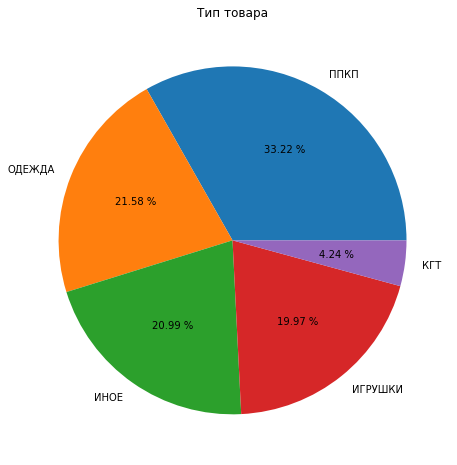

In [85]:
plt.figure(figsize=(10, 8))
plt.pie(df['Тип'].value_counts(), 
        labels = df['Тип'].value_counts().index,
                autopct='%.2f %%')

plt.title('Тип товара')
plt.show()

# Группа 2

In [86]:
df['Группа2'].value_counts(dropna = False, normalize=True)

NaN                          0.194302
ТЕКСТИЛЬ, ТРИКОТАЖ           0.174361
ИГРУШКИ                      0.157098
ДЕТСКОЕ ПИТАНИЕ              0.137252
КОСМЕТИКА/ГИГИЕНА            0.079411
ПОДГУЗНИКИ                   0.071599
КАНЦТОВАРЫ, КНИГИ, ДИСКИ     0.042555
КРУПНОГАБАРИТНЫЙ ТОВАР       0.042402
ТОВАРЫ ДЛЯ КОРМЛЕНИЯ         0.042397
ОБУВЬ                        0.041484
ТОВАРЫ ДЛЯ ЖИВОТНЫХ          0.011304
ЖЕНСКИЕ ШТУЧКИ               0.002761
ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА    0.001542
СОПУТСТВУЮЩИЕ ТОВАРЫ         0.001531
Name: Группа2, dtype: float64

Очень много твоаров не имеют группы 2, составляет 20 процентов. Что будем делать? Это очень важная информация

Рассмотрим каждый тип

## ППКП

In [87]:
df[df['Тип'] == 'ППКП']['Группа2'].value_counts(dropna = False, normalize=True)

ДЕТСКОЕ ПИТАНИЕ         0.413173
КОСМЕТИКА/ГИГИЕНА       0.239052
ПОДГУЗНИКИ              0.215538
ТОВАРЫ ДЛЯ КОРМЛЕНИЯ    0.127629
СОПУТСТВУЮЩИЕ ТОВАРЫ    0.004607
Name: Группа2, dtype: float64

Заметим, что нет Null-знаечний

Рассмотрим примеры.

In [88]:
df[df['Тип'] == 'ППКП'][['ТипТовара','Тип', 'Группа4', 'Группа3', 'Группа2']].head()

,ТипТовара,Тип,Группа4,Группа3,Группа2
6,МГТ,ППКП,салфетки,СРЕДСТВА ГИГИЕНЫ,КОСМЕТИКА/ГИГИЕНА
31,МГТ,ППКП,подгузники,ПОДГУЗНИКИ,ПОДГУЗНИКИ
36,МГТ,ППКП,NaN,ЗАМЕНИТЕЛИ МОЛОКА,ДЕТСКОЕ ПИТАНИЕ
37,МГТ,ППКП,бакалея прочие,БАКАЛЕЯ,ДЕТСКОЕ ПИТАНИЕ
38,МГТ,ППКП,бакалея прочие,БАКАЛЕЯ,ДЕТСКОЕ ПИТАНИЕ


In [89]:
df[(df['Тип'] == 'ППКП') & (df['Группа2'].isnull())].head()

,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,ДатаДоставки,ГодДатыДоставки,МесяцДатыДоставки,ДеньДатыДоставки,МетодДоставки,ФормаОплаты,Регион,Гео,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,ПВЗ_код,Статус,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,ЭлектроннаяПочта_new,Клиент,ГородМагазина,МагазинЗаказа,День недели,Округ


## ОДЕЖДА

In [90]:
df[df['Тип'] == 'ОДЕЖДА']['Группа2'].value_counts(dropna = False,normalize=True)

ТЕКСТИЛЬ, ТРИКОТАЖ    0.807807
ОБУВЬ                 0.192193
Name: Группа2, dtype: float64

Рассмотрим примеры.

In [91]:
df[df['Тип'] == 'ОДЕЖДА'][['ТипТовара','Тип', 'Группа4', 'Группа3', 'Группа2']].drop_duplicates().head()

,ТипТовара,Тип,Группа4,Группа3,Группа2
0,МГТ,ОДЕЖДА,носки,ДЕТСКИЕ КОЛГОТКИ И НОСКИ,"ТЕКСТИЛЬ, ТРИКОТАЖ"
4,МГТ,ОДЕЖДА,колготки,ДЕТСКИЕ КОЛГОТКИ И НОСКИ,"ТЕКСТИЛЬ, ТРИКОТАЖ"
13,МГТ,ОДЕЖДА,трусы,ДЕТСКОЕ БЕЛЬЁ,"ТЕКСТИЛЬ, ТРИКОТАЖ"
15,МГТ,ОДЕЖДА,ползунки,ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),"ТЕКСТИЛЬ, ТРИКОТАЖ"
16,МГТ,ОДЕЖДА,брюки,ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),"ТЕКСТИЛЬ, ТРИКОТАЖ"


## ИГРУШКИ

In [92]:
df[df['Тип'] == 'ИГРУШКИ']['Группа2'].value_counts(dropna = False, normalize=True)

ИГРУШКИ                     0.786854
КАНЦТОВАРЫ, КНИГИ, ДИСКИ    0.213146
Name: Группа2, dtype: float64

In [93]:
df[df['Тип'] == 'ИГРУШКИ'][['ТипТовара','Тип', 'Группа4', 'Группа3', 'Группа2']].drop_duplicates().head()

,ТипТовара,Тип,Группа4,Группа3,Группа2
29,МГТ,ИГРУШКИ,"ранцы, рюкзаки, пеналы",КАНЦТОВАРЫ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ"
74,МГТ,ИГРУШКИ,каталки ручные,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,ИГРУШКИ
77,МГТ,ИГРУШКИ,конструкторы - тип Лего,КОНСТРУКТОРЫ,ИГРУШКИ
84,МГТ,ИГРУШКИ,музыкальные мобили для кроваток,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,ИГРУШКИ
112,МГТ,ИГРУШКИ,предметы для рисования,КАНЦТОВАРЫ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ"


## КГТ

In [94]:
df[df['Тип'] == 'КГТ']['Группа2'].value_counts(dropna = False,normalize=True)

КРУПНОГАБАРИТНЫЙ ТОВАР    1.0
Name: Группа2, dtype: float64

In [95]:
df[df['Тип'] == 'КГТ'][['ТипТовара','Тип', 'Группа4', 'Группа3', 'Группа2']].drop_duplicates().head()

,ТипТовара,Тип,Группа4,Группа3,Группа2
12,КГТ,КГТ,горшки,ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ,КРУПНОГАБАРИТНЫЙ ТОВАР
76,КГТ,КГТ,КОЛЯСКИ ЕВРОПА,КОЛЯСКИ,КРУПНОГАБАРИТНЫЙ ТОВАР
87,КГТ,КГТ,стулья для кормления деревянные,ДЕТСКИЕ СТУЛЬЯ ДЛЯ КОРМЛЕНИЯ,КРУПНОГАБАРИТНЫЙ ТОВАР
274,КГТ,КГТ,накладки на унитаз,ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ,КРУПНОГАБАРИТНЫЙ ТОВАР
302,КГТ,КГТ,горки и сидения для купания,ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ,КРУПНОГАБАРИТНЫЙ ТОВАР


С КГТ не совсем понятно, надо попробовать все таки вычленить какаие-то основные категории в 'группа2'

## ИНОЕ

In [96]:
df[df['Тип'] == 'ИНОЕ']['Группа2'].value_counts(dropna = False, normalize = True)

NaN                          0.925650
ТОВАРЫ ДЛЯ ЖИВОТНЫХ          0.053851
ЖЕНСКИЕ ШТУЧКИ               0.013154
ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА    0.007346
Name: Группа2, dtype: float64

Очень много NaN

In [97]:
df[(df['Тип'] == 'ИНОЕ') & (df['Группа2'].isnull())][['ТипТовара','Тип', 'Группа4', 'Группа3', 'Группа2', 'Номенклатура']].drop_duplicates().head()

,ТипТовара,Тип,Группа4,Группа3,Группа2,Номенклатура
7,ИНОЕ,ИНОЕ,NaN,NaN,NaN,Доставка


In [98]:
df[(df['Тип'] == 'ИНОЕ') & (df['Группа2'].isnull())]['ID_SKU'].unique()

array(['ID10022107250'], dtype=object)

По номенклатуре видно, что это Доставка

# Группа 3

In [99]:
df['Группа3'].value_counts(dropna = False, normalize = True)

NaN                                   1.943025e-01
ПЮРЕ                                  7.303144e-02
ПОДГУЗНИКИ                            6.548147e-02
ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ          4.893047e-02
ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет)    4.471293e-02
                                          ...     
ЗАПЧАСТИ ДЛЯ ИГРУШЕК                  3.585832e-06
СВЕТООТРАЖАЮЩИЕ ЭЛЕМЕНТЫ              2.988193e-06
ТЕХНИКА ДЛЯ ДОМА                      2.390554e-06
ГЛАДИЛЬНЫЕ ДОСКИ,СУШИЛКИ              1.195277e-06
ЗЕРКАЛА                               5.976386e-07
Name: Группа3, Length: 99, dtype: float64

С данными в колонке 'Группа3',  которые относятся к Типу (ППКП,ОДЕЖДА,ИГРУШКИ) должно быть все ок.

Рассмотрим тех, кто относится к КГТ.

In [100]:
df[df['Тип'] == 'КГТ']['Группа3'].value_counts(dropna = False)

ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ             15716
КОЛЯСКИ                             14190
ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ                7552
АВТОКРЕСЛА                           7386
ДЕТСКИЕ СТУЛЬЯ ДЛЯ КОРМЛЕНИЯ         4813
ВЕЛОСИПЕДЫ/САМОКАТЫ                  4720
СПОРТИВНЫЕ КОМПЛЕКСЫ И ПЕСОЧНИЦЫ     4584
КАТАЛКИ/КАЧАЛКИ                      3644
КОЛЯСКИ ДЛЯ КУКОЛ                    2333
МАНЕЖИ/ШЕЗЛОНГИ                      1798
САНКИ/СНЕГОКАТЫ                      1462
КОРЗИНЫ, ЯЩИКИ ДЛЯ ИГРУШЕК           1231
ХОДУНКИ/ПРЫГУНКИ                      877
ЭЛЕКТРОМОБИЛИ/МАШИНЫ ПЕДАЛЬНЫЕ        644
Name: Группа3, dtype: int64

# Группа 4

In [101]:
df['Группа4'].value_counts(dropna = False)

NaN                   381263
трусики-подгузники     54502
подгузники             49451
пюре фруктовые         41426
пюре мясные            34202
                       ...  
гигиена и здоровье         1
кофеварки                  1
утюги                      1
столы пеленальные          1
подвески                   1
Name: Группа4, Length: 450, dtype: int64

Nan стало больше. Посомтрим где, кроме как в ИНОЕ

In [102]:
df[(df['Тип'] != 'ИНОЕ') & (df['Группа4'].isnull())][['ТипТовара','Тип', 'Группа4', 'Группа3', 'Группа2', 'Номенклатура']].drop_duplicates().head()

,ТипТовара,Тип,Группа4,Группа3,Группа2,Номенклатура
36,МГТ,ППКП,NaN,ЗАМЕНИТЕЛИ МОЛОКА,ДЕТСКОЕ ПИТАНИЕ,"БЕБИ PREMIUM 2 , СМЕСЬ молочная, (400 г/пачка)"
221,МГТ,ППКП,NaN,ЗАМЕНИТЕЛИ МОЛОКА,ДЕТСКОЕ ПИТАНИЕ,"НАН, ЗАМЕНИТЕЛЬ молока безлактозный с рожд., (..."
237,МГТ,ППКП,NaN,ЗАМЕНИТЕЛИ МОЛОКА,ДЕТСКОЕ ПИТАНИЕ,"НЭННИ КЛАССИКА, ЗАМЕНИТЕЛЬ молока, (400 г)"
264,МГТ,ППКП,NaN,ПЕЛЕНКИ ОДНОРАЗОВЫЕ,ПОДГУЗНИКИ,"MINIMAX, ПЕЛЕНКИ дет., (60*60 см), (5 шт)"
368,МГТ,ППКП,NaN,ЗАМЕНИТЕЛИ МОЛОКА,ДЕТСКОЕ ПИТАНИЕ,"НЭННИ 1, ЗАМЕНИТЕЛЬ молока, с пребиотиками, (8..."


Так как у данных записей есть Группа3, добавим в группу4 данные из группы 3

In [103]:
mask_group = (df['Тип'] != 'ИНОЕ') & (df['Группа4'].isnull())
df.loc[mask_group,'Группа4'] = df[mask_group]['Группа3']


In [104]:
df['Группа4'].value_counts(dropna = False)

NaN                   325435
трусики-подгузники     54502
подгузники             49451
пюре фруктовые         41426
пюре мясные            34202
                       ...  
гигиена и здоровье         1
подвески                   1
кофеварки                  1
увлажнители                1
столы пеленальные          1
Name: Группа4, Length: 474, dtype: int64

In [105]:
df[(df['Группа4'].isnull()) &(df['Тип'] != 'ИНОЕ')]

,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,ДатаДоставки,ГодДатыДоставки,МесяцДатыДоставки,ДеньДатыДоставки,МетодДоставки,ФормаОплаты,Регион,Гео,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,ПВЗ_код,Статус,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,ЭлектроннаяПочта_new,Клиент,ГородМагазина,МагазинЗаказа,День недели,Округ


## Самые популярные товары

In [106]:
df['Группа4'].value_counts(dropna = False).nlargest(5)

NaN                   325435
трусики-подгузники     54502
подгузники             49451
пюре фруктовые         41426
пюре мясные            34202
Name: Группа4, dtype: int64

# Бренд

In [107]:
df['Номенклатура'] = df['Номенклатура'].apply(lambda x : x.split(',')[0].split()[0] if len(x.split(',')[0]) > 15 else x.split(',')[0]) 
df

,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,ДатаДоставки,ГодДатыДоставки,МесяцДатыДоставки,ДеньДатыДоставки,МетодДоставки,ФормаОплаты,Регион,Гео,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,ПВЗ_код,Статус,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,ЭлектроннаяПочта_new,Клиент,ГородМагазина,МагазинЗаказа,День недели,Округ
0,5031788_TR,Доставлен,1 634,1 634,2017-07-01,2017,7,1,0,2017-06-07 00:00:00,2017.0,6.0,7.0,Магазины,Безналичная,Москва,Москва,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,носки,МАТЭКО,IDL00051334048,Нет,NaN,1,50,"23,1",901000646,Доставлен,"26,9",49,49,3,1,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,Москва,NaN,Пятница,CENTRAL
1,5031788_TR,Доставлен,1 634,1 634,2017-07-01,2017,7,1,0,2017-06-07 00:00:00,2017.0,6.0,7.0,Магазины,Безналичная,Москва,Москва,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,носки,МАТЭКО,IDL00051367351,Нет,NaN,1,50,"23,1",901000646,Доставлен,"26,9",49,49,4,1,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,Москва,NaN,Пятница,CENTRAL
2,5031788_TR,Доставлен,1 634,1 634,2017-07-01,2017,7,1,0,2017-06-07 00:00:00,2017.0,6.0,7.0,Магазины,Безналичная,Москва,Москва,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,носки,ЗАЙКА МОЯ,IDL00007611755,Нет,NaN,1,49,"40,96",901000646,Доставлен,"8,04",49,49,7,1,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,Москва,NaN,Пятница,CENTRAL
3,5031788_TR,Доставлен,1 634,1 634,2017-07-01,2017,7,1,0,2017-06-07 00:00:00,2017.0,6.0,7.0,Магазины,Безналичная,Москва,Москва,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,носки,ЗАЙКА МОЯ,IDL00014478250,Нет,NaN,1,40,"34,21",901000646,Доставлен,"5,79",49,49,1,1,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,Москва,NaN,Пятница,CENTRAL
4,5031788_TR,Доставлен,1 634,1 634,2017-07-01,2017,7,1,0,2017-06-07 00:00:00,2017.0,6.0,7.0,Магазины,Безналичная,Москва,Москва,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,колготки,ЗАЙКА МОЯ,IDL00001209351,Нет,NaN,1,169,"105,21",901000646,Доставлен,"63,79",49,49,9,1,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,Москва,NaN,Пятница,CENTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876070,6005071_ES,К отгрузке,3 222,3 222,2017-10-31,2017,10,31,23,2017-02-11 00:00:00,2017.0,2.0,11.0,Курьерская,Наличная,Москва,Москва,МГТ,ППКП,КОСМЕТИКА/ГИГИЕНА,СРЕДСТВА БЫТОВОЙ ХИМИИ,кондиционеры для белья,BURTI,IDL00039538654,Нет,NaN,2,297,253,NaN,Доставлен,88,150,150,3,2,55574953-52575355515475,109117_mu19@inbox.ru,Мария,Москва,NaN,Понедельник,CENTRAL
876071,6005071_ES,К отгрузке,3 222,3 222,2017-10-31,2017,10,31,23,2017-02-11 00:00:00,2017.0,2.0,11.0,Курьерская,Наличная,Москва,Москва,МГТ,ППКП,КОСМЕТИКА/ГИГИЕНА,СРЕДСТВА БЫТОВОЙ ХИМИИ,кондиционеры для белья,BURTI,IDL00039538755,Нет,NaN,2,281,253,NaN,Доставлен,56,150,150,2,2,55574953-52575355515475,109117_mu19@inbox.ru,Мария,Москва,NaN,Понедельник,CENTRAL
876072,6005077_ES,Возврат из ПВЗ,2 564,2 564,2017-10-31,2017,10,31,23,2017-03-11 00:00:00,2017.0,3.0,11.0,Магазины,Безналичная,Москва,Москва,МГТ,ИГРУШКИ,ИГРУШКИ,ИГРУШКИ ДЛЯ МАЛЬЧИКОВ,"треки, парковки",HOT WHEELS,IDL00043615553,Нет,NaN,1,2 564,2 233,23111,Возврат,331,0,0,1,0,55574857-54545754565577,97117_au19@mail.ru,Дмитрий,Москва,NaN,Понедельник,CENTRAL
876073,6005089_ES,Возврат из ПВЗ,2 564,2 564,2017-10-31,2017,10,31,23,2017-03-11 00:00:00,2017.0,3.0,11.0,Магазины,Безналичная,Москва,Москва,МГТ,ИГРУШКИ,ИГРУШКИ,ИГРУШКИ ДЛЯ МАЛЬЧИКОВ,"треки, парковки",HOT WHEELS,IDL00043615553,Нет,NaN,1,2 564,2 233,23111,Возврат,331,0,0,1,0,55574857-54545754565577,97117_au19@mail.ru,Дмитрий,Москва,NaN,Понедельник,CENTRAL


## Самые популярные бренды

Видим доставку, которую надо будет удалить.

In [108]:
df['Номенклатура'].value_counts().nlargest(5)

Доставка       325117
LEADER KIDS     52550
ГЕРБЕР          36565
ИГРУША          31890
ФРУТОНЯНЯ       31826
Name: Номенклатура, dtype: int64

Записи о доставки имеют много нулевых значений, но не будут учитываться при вычислении маржи, среднего чека и т.д. + данные о сумме доставки указаны в каждой строке транзакции.

Таким образом, имеет смысл удалить эти данные

# УДАЛЕНИЕ ДОСТАВКИ ИЗ ТРАНЗАКЦИЙ

Записи о доставки имеют много нулевых значений, но не будут учитываться при вычислении маржи, среднего чека и т.д. + данные о сумме доставки указаны в каждой строке транзакции.

Таким образом, имеет смысл удалить эти данные

In [109]:
df = df[~(df['Номенклатура'] == 'Доставка')]

# ID_SKU

In [110]:
df['ID_SKU'].unique().shape

(149863,)

**149723**  уникальных товаров

# Отменены и причины

In [111]:
df['Отменено'].value_counts(dropna=False, normalize=True)

Нет    0.878827
Да     0.121173
Name: Отменено, dtype: float64

90 процентов товаров не были отменены.

In [112]:
df['ПричинаОтмены'].value_counts()

1.5 Письмо об отмене                                                            43437
Возврат товара                                                                  26340
Авто корректировка склада                                                       20306
1.4 Ошибка выбора, будет новый заказ                                            13938
4.04 Не пришел товар от поставщика                                              11760
5.3 Другое                                                                       8227
4.01 Нет на остатках или нет в обработке ЗПЗ                                     7707
1.3 Не верные контактные данные или нет связи с клиентом                         7525
2.1 Не устроила дата доставки                                                    6657
4.02 Нет основных позиций заказа                                                 4122
5.1 Уже купил товар в другом месте                                               2677
Авто корректировка ЗПЗ                                

In [113]:
df['ПричинаОтмены'] = df['ПричинаОтмены'].str.strip()

<ipython-input-113-bf17c8bf6bd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ПричинаОтмены'] = df['ПричинаОтмены'].str.strip()


Удалим очевидно тестовые данные, которые не понадобятся для дальнейшего анализа.

In [115]:
df = df[~(df['ПричинаОтмены'] == '1.1 Тест, контрольная закупка')]

# Количество и Количество продано клиенту

In [116]:
df[df['Количество'] != df['КоличествоПроданоКлиенту']].shape

(262166, 43)

262.166 случаев, когда заказанное количество != выкупленному количеству

# Цена

In [117]:
df['Цена'].value_counts()

299         18065
199         15878
49          14399
399         12601
999         11938
            ...  
129,93          1
3 174,34        1
16 089          1
56,56           1
342,24          1
Name: Цена, Length: 14958, dtype: int64

In [118]:
df['Цена'] = df['Цена'].str.replace(',', '.').str.replace(' ', '').astype(float)

<AxesSubplot:>

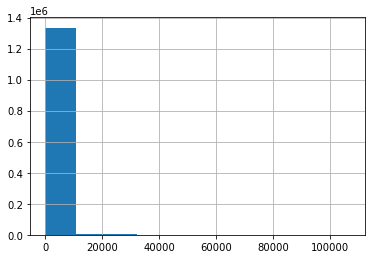

In [119]:
df['Цена'].hist()

Как видим, что костяк цен укладываются в диапозоне меньше 3.000

<AxesSubplot:>

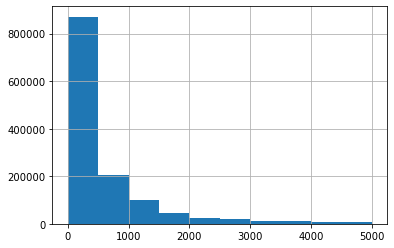

In [120]:
df[df['Цена'] < 5000]['Цена'].hist()

In [121]:
df['Цена'].median()

282.0

In [122]:
df['Цена'].mean()

902.0159614400889

In [123]:
df['Цена'].std()

2309.3263536900904

In [124]:
df['Цена'].describe()

count    1.346839e+06
mean     9.020160e+02
std      2.309326e+03
min      0.000000e+00
25%      9.600000e+01
50%      2.820000e+02
75%      8.630000e+02
max      1.070000e+05
Name: Цена, dtype: float64

# Цена закупки и маржа

In [125]:
df['ЦенаЗакупки']  = df['ЦенаЗакупки'].str.replace(',', '.').str.replace(' ', '').astype(float)

<AxesSubplot:>

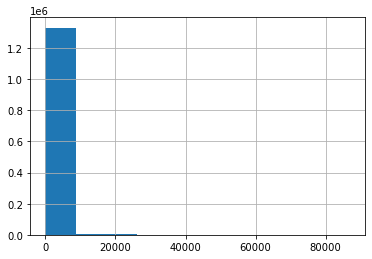

In [126]:
df['ЦенаЗакупки'].hist()

<AxesSubplot:>

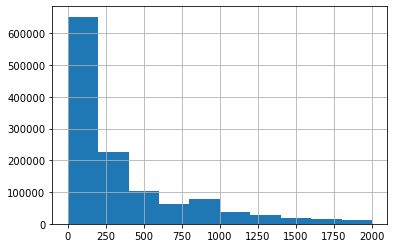

In [127]:
df[df['ЦенаЗакупки'] < 2000]['ЦенаЗакупки'].hist()

In [128]:
df['ЦенаЗакупки'].median()

210.04

In [129]:
df['ЦенаЗакупки'].mean()

689.6427698162365

In [130]:
df['ЦенаЗакупки'].std()

1737.7180359882743

In [131]:
df['ЦенаЗакупки'].describe()

count    1.342006e+06
mean     6.896428e+02
std      1.737718e+03
min      1.000000e-02
25%      7.601000e+01
50%      2.100400e+02
75%      6.641600e+02
max      8.690000e+04
Name: ЦенаЗакупки, dtype: float64

## Нулевая цена закупки

In [132]:
df[df['ЦенаЗакупки'].isnull()]

,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,ДатаДоставки,ГодДатыДоставки,МесяцДатыДоставки,ДеньДатыДоставки,МетодДоставки,ФормаОплаты,Регион,Гео,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,ПВЗ_код,Статус,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,ЭлектроннаяПочта_new,Клиент,ГородМагазина,МагазинЗаказа,День недели,Округ
666,5032060_TR,Доставлен,1 557,"1 148,10",2017-07-01,2017,7,1,2,2017-07-14 00:00:00,2017.0,7.0,14.0,Магазины,Безналичная,Таганрог,Регионы,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКОЕ БЕЛЬЁ,трусы,DONELLA,IDL00052421654,Да,4.04 Не пришел товар от поставщика,1,110.0,NaN,23111,Доставлен,NaN,99,99,7,1,55575349-53485756525172,101117_eu15@front.ru,Елена,Таганрог,NaN,Пятница,SOUTHERN
1587,5032622_TR,Доставлен,12 156,12 156,2017-07-01,2017,7,1,8,2017-08-07 00:00:00,2017.0,8.0,7.0,Магазины,Безналичная,Щелковский район,МО,МГТ,ППКП,СОПУТСТВУЮЩИЕ ТОВАРЫ,АКСЕССУАРЫ ДЛЯ ДЕВОЧЕК,бижутерия,SPIEGELBURG,IDL00049235856,Нет,NaN,1,539.0,NaN,GL0285876,Доставлен,NaN,49,49,5,0,55574853-53535356504973,guest_103117_gu28@workmail.ru,Гость,Щелково,NaN,Пятница,CENTRAL
2324,5033150_TR,Возврат из ПВЗ,9 091,6 687,2017-07-01,2017,7,1,19,2017-11-07 00:00:00,2017.0,11.0,7.0,Магазины,Безналичная,Павлово-Посадский район,МО,МГТ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КАНЦТОВАРЫ,"ранцы, рюкзаки, пеналы",BRAUBERG,IDL00052354755,Нет,NaN,1,290.0,NaN,23111,Возврат,NaN,49,49,3,1,55575057-53534951495678,105117_iu17@mail.ru,irina,Павловский Посад,NaN,Пятница,CENTRAL
2333,5033150_TR,Возврат из ПВЗ,9 091,6 687,2017-07-01,2017,7,1,19,2017-11-07 00:00:00,2017.0,11.0,7.0,Магазины,Безналичная,Павлово-Посадский район,МО,МГТ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КАНЦТОВАРЫ,"ранцы, рюкзаки, пеналы",BRAUBERG,IDL00036088654,Нет,NaN,1,100.0,NaN,23111,Возврат,NaN,49,49,9,0,55575057-53534951495678,105117_iu17@mail.ru,irina,Павловский Посад,NaN,Пятница,CENTRAL
2335,5033150_TR,Возврат из ПВЗ,9 091,6 687,2017-07-01,2017,7,1,19,2017-11-07 00:00:00,2017.0,11.0,7.0,Магазины,Безналичная,Павлово-Посадский район,МО,МГТ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КАНЦТОВАРЫ,"ранцы, рюкзаки, пеналы",BRAUBERG,IDL00036249957,Нет,NaN,1,1580.0,NaN,23111,Возврат,NaN,49,49,6,0,55575057-53534951495678,105117_iu17@mail.ru,irina,Павловский Посад,NaN,Пятница,CENTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875173,6004666_TR,Доставлен,2 041,2 041,2017-10-31,2017,10,31,23,2017-11-17 00:00:00,2017.0,11.0,17.0,Магазины,Безналичная,Сочи,Регионы,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),брюки,LEADER KIDS,IDL00061030250,Нет,NaN,1,330.0,NaN,GL0285876,Доставлен,NaN,99,99,7,1,55575451-49545051485570,112117_pu22@mail.ru,Елена,Сочи,NaN,Понедельник,SOUTHERN
875478,6004844_TR,Доставлен,6 144,6 144,2017-10-31,2017,10,31,23,2017-07-11 00:00:00,2017.0,7.0,11.0,Магазины,Безналичная,Москва,Москва,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),ползунки,AGA,IDL00057667755,Нет,NaN,1,270.0,NaN,GL0285876,Доставлен,NaN,49,49,3,1,55574851-50525755535477,102117_fu16@yandex.ru,Светлана,Москва,NaN,Понедельник,CENTRAL
875480,6004844_TR,Доставлен,6 144,6 144,2017-10-31,2017,10,31,23,2017-07-11 00:00:00,2017.0,7.0,11.0,Магазины,Безналичная,Москва,Москва,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),комбинезоны,AGA,IDL00057680654,Нет,NaN,1,770.0,NaN,GL0285876,Доставлен,NaN,49,49,8,1,55574851-50525755535477,102117_fu16@yandex.ru,Светлана,Москва,NaN,Понедельник,CENTRAL
875683,6004926_TR,Возврат из ПВЗ,3 279,1 639,2017-10-31,2017,10,31,23,2017-11-11 00:00:00,2017.0,11.0,11.0,Магазины,Безналичная,Белгород,Регионы,МГТ,ППКП,ПОДГУЗНИКИ,ПОДГУЗНИКИ,трусики-подгузники,МУНИ,ID000sm-4476856,Да,4.04 Не пришел товар от поставщика,1,1640.0,NaN,GL0316564,Возврат,NaN,149,149,1,1,55574856-555

У товаров, цена закупки и маржа которых неизвестна, но известна Группа4 - поставить медиану или среднее вместо Null

In [133]:
group4_list = df[(df['ЦенаЗакупки'].isnull())]['Группа4'].unique()
#примеры
group4_list[:10]

array(['трусы', 'бижутерия', 'ранцы, рюкзаки, пеналы',
       '15-36 кг (автокресла, бустеры)', 'транспорт прочий', 'горшки',
       'игрушки из дерева', 'майки', 'обучающие книги для детей',
       'растяжки'], dtype=object)

In [134]:
gb_procurement_cost = df[df['Группа4'].isin(group4_list)].groupby('Группа4')['ЦенаЗакупки'].mean()
gb_procurement_cost

Группа4
0-18 кг (автокресла)              7203.970680
15-36 кг (автокресла, бустеры)    4521.764709
9-36 кг (автокресла)              5549.238173
АКСЕССУАРЫ ДЛЯ КОЛЯСОК             767.184921
ЗАМЕНИТЕЛИ МОЛОКА                  685.613691
                                     ...     
щетки зубные                       150.226755
щетки, расчески                    328.269284
электромобили                     4622.465216
электронные игры                   234.939330
юбки                               368.795006
Name: ЦенаЗакупки, Length: 279, dtype: float64

## Обогащение данных по цене закупке по среднему из категории 4

In [135]:
df['ЦенаЗакупки'] = df.apply(lambda x: 
                    round(gb_procurement_cost.loc[x['Группа4']], 1)
                    if x['Группа4'] in group4_list
                   else x['ЦенаЗакупки'], axis = 1)

# Статус

In [136]:
df['Статус'].value_counts(dropna=False, normalize=True)

Доставлен       0.668603
Возврат         0.211042
Отменен         0.089053
В процессе      0.022295
Не определен    0.009006
Name: Статус, dtype: float64

Аналитику покупательских предпочтений будет производитьсяна тех заказах, которые были доставлены.
Однако понадобятся данные по кол-ву возвратов и отме

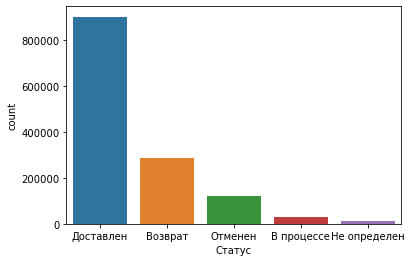

In [137]:
ax = sns.countplot(x = 'Статус', data=df)

In [138]:
df[df['Статус'].isnull()]

,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,ДатаДоставки,ГодДатыДоставки,МесяцДатыДоставки,ДеньДатыДоставки,МетодДоставки,ФормаОплаты,Регион,Гео,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,ПВЗ_код,Статус,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,ЭлектроннаяПочта_new,Клиент,ГородМагазина,МагазинЗаказа,День недели,Округ


## Статус VS Новый Статус

In [139]:
df[df['Статус'] != df['НовыйСтатус']][['НовыйСтатус', 'Статус']]

,НовыйСтатус,Статус
29,Возврат из ПВЗ,Возврат
31,К отгрузке,Доставлен
32,Возврат из ПВЗ,Возврат
33,Возврат из ПВЗ,Возврат
42,Возврат из ПВЗ,Возврат
...,...,...
876069,К отгрузке,Доставлен
876070,К отгрузке,Доставлен
876071,К отгрузке,Доставлен
876072,Возврат из ПВЗ,Возврат


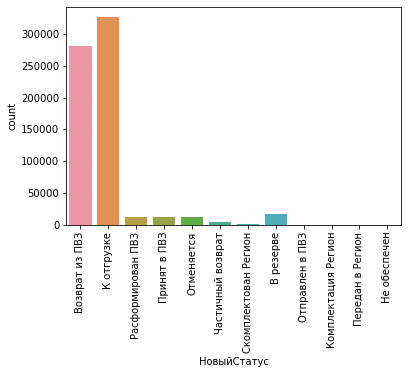

In [140]:
ax = sns.countplot(x = 'НовыйСтатус', data = df[df['Статус'] != df['НовыйСтатус']])
ax.set_xticklabels(labels = ax.get_xticklabels(),  rotation=90);

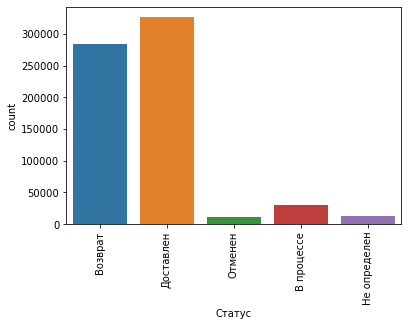

In [141]:
bx = sns.countplot(x = 'Статус', data = df[df['Статус'] != df['НовыйСтатус']])
bx.set_xticklabels(labels = bx.get_xticklabels(),  rotation=90);

В данном анализе Новый статус не даст нужной информации, так что он будет удален. 


In [142]:
df.drop(columns=['НовыйСтатус'], inplace=True)

# Маржа

In [143]:
df['Маржа'] = df['Маржа'].str.replace(',', '.').str.replace(' ', '').astype(float)

In [144]:
df['Маржа'].describe()

count    1.342006e+06
mean     2.213096e+02
std      7.238598e+02
min     -1.823955e+04
25%      1.198000e+01
50%      4.820000e+01
75%      1.510000e+02
max      4.427000e+04
Name: Маржа, dtype: float64

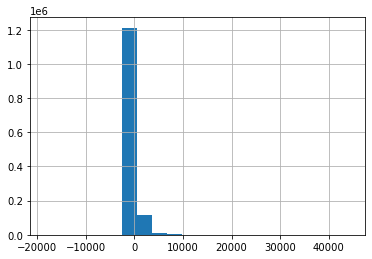

In [145]:
df['Маржа'].hist(bins = 20)
plt.show()

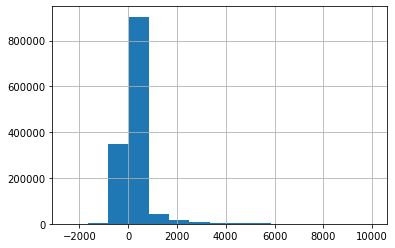

In [146]:
df[(df['Маржа'] < 10000) & (df['Маржа'] > -2500)]['Маржа'].hist(bins = 15)
plt.show()

In [147]:
df['Маржа'].mean()

221.309554793323

In [148]:
df['Маржа'].median()

48.2

In [149]:
df['Маржа'].std()

723.8598320335251

Маржа небольшая.  В основном сосредоточена вокруг 0

## Маржа vs остальные параметры

In [150]:
df[['НомерЗаказаНаСайте', 'Цена', 'ЦенаЗакупки', 'Маржа', 'СуммаУслуг', 'СуммаДоставки','Группа4']].head(30)

,НомерЗаказаНаСайте,Цена,ЦенаЗакупки,Маржа,СуммаУслуг,СуммаДоставки,Группа4
0,5031788_TR,50.0,40.50,26.90,49,49,носки
1,5031788_TR,50.0,40.50,26.90,49,49,носки
2,5031788_TR,49.0,40.50,8.04,49,49,носки
3,5031788_TR,40.0,40.50,5.79,49,49,носки
4,5031788_TR,169.0,112.10,63.79,49,49,колготки
5,5031788_TR,199.0,112.10,95.18,49,49,колготки
6,5031788_TR,178.0,128.30,8.15,49,49,салфетки
8,5031788_TR,139.0,112.10,35.18,49,49,колготки
9,5031788_TR,129.0,112.10,23.79,49,49,колготки
10,5031788_TR,69.0,40.50,22.74,49,49,носки


Рассматриваем маржу на примере заказа *5031788_TR*

In [151]:
df[df['НомерЗаказаНаСайте'] == '5031788_TR'].sort_values(by  = 'НомерСтроки' )

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,ДатаДоставки,ГодДатыДоставки,МесяцДатыДоставки,ДеньДатыДоставки,МетодДоставки,ФормаОплаты,Регион,Гео,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,ПВЗ_код,Статус,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,ЭлектроннаяПочта_new,Клиент,ГородМагазина,МагазинЗаказа,День недели,Округ
3,5031788_TR,1 634,1 634,2017-07-01,2017,7,1,0,2017-06-07 00:00:00,2017.0,6.0,7.0,Магазины,Безналичная,Москва,Москва,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,носки,ЗАЙКА МОЯ,IDL00014478250,Нет,NaN,1,40.0,40.5,901000646,Доставлен,5.79,49,49,1,1,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,Москва,NaN,Пятница,CENTRAL
11,5031788_TR,1 634,1 634,2017-07-01,2017,7,1,0,2017-06-07 00:00:00,2017.0,6.0,7.0,Магазины,Безналичная,Москва,Москва,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,носки,ЗАЙКА МОЯ,IDL00001148149,Нет,NaN,1,49.0,40.5,901000646,Доставлен,13.00,49,49,2,1,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,Москва,NaN,Пятница,CENTRAL
0,5031788_TR,1 634,1 634,2017-07-01,2017,7,1,0,2017-06-07 00:00:00,2017.0,6.0,7.0,Магазины,Безналичная,Москва,Москва,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,носки,МАТЭКО,IDL00051334048,Нет,NaN,1,50.0,40.5,901000646,Доставлен,26.90,49,49,3,1,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,Москва,NaN,Пятница,CENTRAL
1,5031788_TR,1 634,1 634,2017-07-01,2017,7,1,0,2017-06-07 00:00:00,2017.0,6.0,7.0,Магазины,Безналичная,Москва,Москва,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,носки,МАТЭКО,IDL00051367351,Нет,NaN,1,50.0,40.5,901000646,Доставлен,26.90,49,49,4,1,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,Москва,NaN,Пятница,CENTRAL
6,5031788_TR,1 634,1 634,2017-07-01,2017,7,1,0,2017-06-07 00:00:00,2017.0,6.0,7.0,Магазины,Безналичная,Москва,Москва,МГТ,ППКП,КОСМЕТИКА/ГИГИЕНА,СРЕДСТВА ГИГИЕНЫ,салфетки,МЕРРИЕС,ID10008459553,Нет,NaN,1,178.0,128.3,901000646,Доставлен,8.15,49,49,5,1,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,Москва,NaN,Пятница,CENTRAL
10,5031788_TR,1 634,1 634,2017-07-01,2017,7,1,0,2017-06-07 00:00:00,2017.0,6.0,7.0,Магазины,Безналичная,Москва,Москва,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,носки,TWINS.,IDL00000338654,Нет,NaN,1,69.0,40.5,901000646,Доставлен,22.74,49,49,6,1,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,Москва,NaN,Пятница,CENTRAL
2,5031788_TR,1 634,1 634,2017-07-01,2017,7,1,0,2017-06-07 00:00:00,2017.0,6.0,7.0,Магазины,Безналичная,Москва,Москва,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,носки,ЗАЙКА МОЯ,IDL00007611755,Нет,NaN,1,49.0,40.5,901000646,Доставлен,8.04,49,49,7,1,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,Москва,NaN,Пятница,CENTRAL
13,5031788_TR,1 634,1 634,2017-07-01,2017,7,1,0,2017-06-07 00:00:00,2017.0,6.0,7.0,Магазины,Безналичная,Москва,Москва,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКОЕ БЕЛЬЁ,трусы,LEADER KIDS,IDL00042510553,Нет,NaN,1,69.0,81.4,901000646,Доставлен,24.00,49,49,8,1,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,Москва,NaN,Пятница,CENTRAL
4,5031788_TR,1 634,1 634,2017-07-01,2017,7,1,0,2017-06-07 00:00:00,2017.0,6.0,7.0,Магазины,Безналичная,Москва,Москва,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,колготки,ЗАЙКА МОЯ,IDL00001209351,Нет,NaN,1,169.0,112.1,901000646,Доставлен,63.79,49,49,9,1,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,Москва,NaN,Пятница,CENTRAL
9,5031788_TR,1 634,1 634,2017-07-01,2017,7,1,0,2017-06-07 00:00:00,2017.0,6.0,7.0,Магазины,Безналичная,Москва,Москва,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,колготки,ЗАЙКА МОЯ,ID9010008905755,Нет,NaN,1,129.0,112.1,901000646,Доставлен,23.79,49,49,10,1,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,Москва,NaN,Пятница,CENTRAL


In [152]:
df[df['НомерЗаказаНаСайте'] == '5031788_TR']['Цена'].sum()

1585.0

In [153]:
df[df['НомерЗаказаНаСайте'] == '5031788_TR']['ЦенаЗакупки'].sum()

1261.7000000000003

In [154]:
df[df['НомерЗаказаНаСайте'] == '5031788_TR']['Маржа'].sum()

497.24

In [155]:
1585.0 - 1261.7000000000003 

323.2999999999997

Получили пример, когда *маржа* из данных != *Цена* - *ЦенаЗакупки*

# Расчитывает настоящую маржу по имеющимся данным

In [156]:
df['МаржаReal'] = df.apply(lambda x: x['Цена'] - x['ЦенаЗакупки'] if not pd.isna(x['ЦенаЗакупки']) else np.NaN, axis = 1)

In [157]:
df[['НомерЗаказаНаСайте', 'Цена', 'ЦенаЗакупки', 'Маржа', 'МаржаReal','СуммаУслуг', 'СуммаДоставки','Группа4']].head(5)

,НомерЗаказаНаСайте,Цена,ЦенаЗакупки,Маржа,МаржаReal,СуммаУслуг,СуммаДоставки,Группа4
0,5031788_TR,50.0,40.5,26.90,9.5,49,49,носки
1,5031788_TR,50.0,40.5,26.90,9.5,49,49,носки
2,5031788_TR,49.0,40.5,8.04,8.5,49,49,носки
3,5031788_TR,40.0,40.5,5.79,-0.5,49,49,носки
4,5031788_TR,169.0,112.1,63.79,56.9,49,49,колготки


# Кол-во vs Кол-во продано клиенту

In [158]:
df[df['Количество'] != df['КоличествоПроданоКлиенту']][['Количество', 'КоличествоПроданоКлиенту']]

,Количество,КоличествоПроданоКлиенту
29,1,0
32,1,0
33,1,0
42,1,0
49,1,0
...,...,...
876015,1,0
876016,1,0
876017,1,0
876072,1,0


In [159]:
df['КоличествоНеПроданоКлиенту'] = df['Количество'] - df['КоличествоПроданоКлиенту']

In [160]:
df['КоличествоНеПроданоКлиенту'].value_counts()

 0      1084673
 1       196098
-1        44362
 2         9936
 3         3154
         ...   
 284          1
 97           1
-41           1
-40           1
 69           1
Name: КоличествоНеПроданоКлиенту, Length: 95, dtype: int64

Заметим, что *количество не продано клиенту* равняется отрицательному числу в некоторых случаях, чегобыть не долнжо.
Исследуем данные примеры.

In [161]:
df[df['КоличествоНеПроданоКлиенту'] < 0][['Количество', 'КоличествоПроданоКлиенту', 'Отменено','ПричинаОтмены']]

,Количество,КоличествоПроданоКлиенту,Отменено,ПричинаОтмены
113,0,1,Да,Авто корректировка склада
144,0,1,Да,Авто корректировка склада
175,0,1,Да,Возврат товара
177,0,2,Да,Возврат товара
182,0,1,Да,Возврат товара
...,...,...,...,...
875833,0,1,Да,Авто корректировка склада
875866,0,1,Да,Авто корректировка склада
875956,0,2,Да,Авто корректировка склада
875963,0,1,Да,Авто корректировка склада


Замечаем, что в основном это Отмененные заказы.

In [162]:
df[(df['КоличествоНеПроданоКлиенту'] < 0) & (df['Отменено'] == 'Нет')][['Количество', 'КоличествоПроданоКлиенту', 'Отменено','ПричинаОтмены']]

,Количество,КоличествоПроданоКлиенту,Отменено,ПричинаОтмены
5165,1,2,Нет,NaN
5166,1,2,Нет,NaN
5167,1,2,Нет,NaN
5168,1,2,Нет,NaN
5170,1,2,Нет,NaN
...,...,...,...,...
730377,0,1,Нет,NaN
765044,0,1,Нет,NaN
768648,0,1,Нет,NaN
768649,0,1,Нет,NaN


Случаи с отрицательным количеством непроданных товаров у заказов без отмены : 

Так как представлена битая информация, трактовать которую можно по-разному - удалим данные записи.

In [163]:
df = df[~((df['КоличествоНеПроданоКлиенту'] < 0) & (df['Отменено'] == 'Нет'))]

In [164]:
df.loc[df['КоличествоНеПроданоКлиенту'] < 0, 'Количество'] = df.loc[df['КоличествоНеПроданоКлиенту'] < 0, 'КоличествоПроданоКлиенту']

In [165]:
df.loc[df['КоличествоНеПроданоКлиенту'] < 0, 'КоличествоПроданоКлиенту'] = 0
df['КоличествоНеПроданоКлиенту'] = df['Количество'] - df['КоличествоПроданоКлиенту']

In [166]:
df['КоличествоНеПроданоКлиенту'].value_counts()

0      1084673
1       240372
2        11672
3         3613
4         1692
        ...   
200          1
37           1
38           1
41           1
284          1
Name: КоличествоНеПроданоКлиенту, Length: 61, dtype: int64

# Сумма Доставки и Сумма Услуг

In [167]:
df['СуммаДоставки'] = pd.to_numeric(df['СуммаДоставки'].str.replace(" ", ""))

In [168]:
df['СуммаДоставки'].describe()

count    1.346759e+06
mean     1.082103e+02
std      2.790013e+02
min      0.000000e+00
25%      4.900000e+01
50%      9.900000e+01
75%      1.500000e+02
max      3.730000e+04
Name: СуммаДоставки, dtype: float64

Очень большая сумма доставки

In [169]:
df[df['НомерЗаказаНаСайте'] == '5136856_TR']

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,ДатаДоставки,ГодДатыДоставки,МесяцДатыДоставки,ДеньДатыДоставки,МетодДоставки,ФормаОплаты,Регион,Гео,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,ПВЗ_код,Статус,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,ЭлектроннаяПочта_new,Клиент,ГородМагазина,МагазинЗаказа,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту
181412,5136856_TR,12 775,12 775,2017-07-16,2017,7,16,14,2017-07-31 00:00:00,2017.0,7.0,31.0,Курьерская,Безналичная,Благовещенск,Регионы,МГТ,ППКП,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,БУТЫЛОЧКИ,"бутылочки, наборы бутылочек",ДОКТОР БРАУН,ID000sn-3505048,Да,2.3 Не устроила стоимость доставки,1,698.0,445.70,NaN,Отменен,116.00,11 000,11000,1,0,55575052-52525550525070,97117_au20@mail.ru,Алексей,Благовещенск,NaN,Суббота,FAR EAST,252.30,1
181413,5136856_TR,12 775,12 775,2017-07-16,2017,7,16,14,2017-07-31 00:00:00,2017.0,7.0,31.0,Курьерская,Безналичная,Благовещенск,Регионы,КГТ,КГТ,КРУПНОГАБАРИТНЫЙ ТОВАР,"КОРЗИНЫ, ЯЩИКИ ДЛЯ ИГРУШЕК",ящики прочие,М-ПЛАСТИКА,IDL00045644452,Да,2.3 Не устроила стоимость доставки,1,855.0,484.03,NaN,Отменен,370.97,11 000,11000,3,0,55575052-52525550525070,97117_au20@mail.ru,Алексей,Благовещенск,NaN,Суббота,FAR EAST,370.97,1
181414,5136856_TR,12 775,12 775,2017-07-16,2017,7,16,14,2017-07-31 00:00:00,2017.0,7.0,31.0,Курьерская,Безналичная,Благовещенск,Регионы,МГТ,ППКП,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,СОСКИ/ПУСТЫШКИ,соски,КАНПОЛ,ID58707149,Да,2.3 Не устроила стоимость доставки,2,111.0,227.90,NaN,Отменен,37.22,11 000,11000,2,0,55575052-52525550525070,97117_au20@mail.ru,Алексей,Благовещенск,NaN,Суббота,FAR EAST,-116.90,2


In [170]:
df['СуммаУслуг'] = pd.to_numeric(df['СуммаУслуг'].str.replace(" ", "")) 
df[df['СуммаДоставки'] != df['СуммаУслуг']][['СуммаДоставки', 'СуммаУслуг']]

,СуммаДоставки,СуммаУслуг
166839,300,0
166840,300,0
166841,300,0
444908,49,1
444909,49,1


В 99% сумма услуг = сумма доставки

# Телефон Почта Клиент

телефон - является способом опознать одного клиента

In [171]:
df['Клиент'] = df['Клиент'].str.lower()
df['Клиент'] = df['Клиент'].str.replace('ё', 'е')

In [172]:
df['Клиент'].unique().shape

(8142,)

8.142 уникальных имени.

Примеры имен : 

In [173]:
df['Клиент'].unique()[:20]

array(['татьяна', 'екатерина', 'гость', 'наумова', 'павел', 'анастасия',
       'анна', 'ксения', 'наталья', 'юлия', 'ольга', 'мария', 'викамика',
       'карина', 'яна', 'людмила', 'елена', 'алина', 'гарден', 'эльвира'],
      dtype=object)

# Предобработка имен

## Если имя содержит цифру -> убираем цифры, убираем @mail

In [174]:
import re

ad = AlphabetDetector()

def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

Пример с битыми именами клиентов

In [175]:
mask_number = [hasNumbers(name) if pd.notna(name) else False for name in df['Клиент']]
df[mask_number]['Клиент'].unique()[:10]

array(['0', '2642440', '2240871', 'kope74', '5065522', 'zemfira25',
       '3919828', 'regina1234', 'fluffy687', '2850196'], dtype=object)

In [176]:
def number_detect(x):
    if pd.isna(x):
        return x
    temp = x.split('@')[0]
    if hasNumbers(x):
        temp = re.sub('\d', '', temp)
    return temp if temp else np.NaN

In [177]:
df['Клиент'] = df['Клиент'].apply(number_detect)

Проверка, что все удалили

In [178]:
mask_number = [hasNumbers(name) if pd.notna(name) else False for name in df['Клиент']]
df[mask_number]['Клиент'].unique()

array([], dtype=object)

## Если имя на латинице -> переводим в русский + убираем @email

In [179]:
def latin_detect(x):
    temp = x.split('@')[0]
    return pytils.translit.detranslify(temp) if temp else np.NaN

Пример имен на латинице

In [180]:
mask_latin = [ad.is_latin(name) if pd.notna(name) else False for name in df['Клиент']]
df[mask_latin]['Клиент'].unique()[:10]

array(['igor', 'zaira', 'irina', 'elena', 'marina', 'veronika', 'olga',
       'maria', 'uliana', 'puchckova'], dtype=object)

In [181]:
mask_latin = [ad.is_latin(name) if pd.notna(name) else False for name in df['Клиент']]
df.loc[mask_latin, 'Клиент'] = df[mask_latin]['Клиент'].apply(latin_detect)

In [182]:
df[mask_latin]['Клиент'].unique()

array(['игор', 'заира', 'ирина', 'елена', 'марина', 'вероника', 'олга',
       'мариа', 'улиана', 'пучcкова', 'албина', 'гуест', 'йанара',
       'олеся', 'агатта', 'виктория', 'рамил', 'катерyнамсу', 'андреy',
       'оляyр', 'сабина', 'ариуна', 'сари', 'тамара', 'константин',
       'игнат', 'заур', 'светлана', 'иля', 'кудиноваеа', 'марииy',
       'катиа', 'анна', 'николаи', 'хиеу', 'лео', 'виcториа', 'раиса',
       'прита', 'уйcнм', 'лирина_олга', 'санал', 'натали', 'йулиа',
       'инна', 'анастасия', 'яна', 'юлиа', 'виква', 'екатерина',
       'мармаха', 'наталя', 'копе', 'лиза', 'алена', 'улия–романова',
       'йуля', 'викториа', 'алина', 'сергеy', 'алиса', 'арес', 'елвира',
       'денис', 'земфира', 'наталиа', 'мад', 'нат', 'алеxандер', 'леyла',
       'тан', 'ели', 'кристина', 'надя', 'евгениа', 'кира', 'галина',
       'регина', 'флуффy', 'нонна', 'седа', 'алла', 'олег', 'римма',
       'танеа', 'в_тополняк', 'аyзат', 'алеxандра', 'татяна', 'вард',
       'евгениарябченко'

Отлично! Перевели. Предобрботка имен закончена. Теперь необходимо : 
1. Определение с помощью pymorthy
2. Если имя есть в  справочнике -> меняем на справочник
3. Изменение фамилий, так как замечено, что он их криво переводит
4. Гостю и всем, у кого не получилось определить пол  ставим на neut

# Определение с помощью библиотеки

In [183]:
#!pip install pymorphy2

import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [184]:
df['Sex'] = df['Клиент'].apply(lambda x: morph.parse(x)[0].tag.gender if pd.notna(x) else np.NaN ) 

In [185]:
df['Sex'].unique()

array(['femn', 'masc', None, nan, 'neut'], dtype=object)

In [186]:
df[['Клиент', 'Sex']].sample(10)

,Клиент,Sex
99141,елена,femn
275079,гость,masc
102359,наталья,femn
482477,яна,masc
715951,гость,masc
238929,дмитрий,masc
130835,гость,masc
631614,ольга,femn
87926,гость,masc
872668,виктория,femn


# Поиск по справчонику

Для точного определения пола по имени был распарсен сайт : https://imya.com/ в файл.

In [187]:
FEMN = 'femn'
MASC = 'masc'
NEUT = 'neut'

In [188]:
df_names = pd.read_csv('names_dict.csv', names  = ['name', 'sex'], index_col='name')

In [189]:
df_names['sex'].replace({'female':'femn', 'male':'masc'}, inplace=True)

Примеры имён из справочника. Есть даже экзотические.

In [190]:
df_names[df_names['sex'] ==  FEMN].sample(5)

,sex
name,
рустина,femn
тавкиля,femn
эмирка,femn
махсуди,femn
айлис,femn


In [191]:
df_names[df_names['sex'] == MASC].sample(5)

,sex
name,
аполлинарий,masc
башир,masc
абулхаир,masc
жумадулла,masc
лоллиан,masc


In [192]:
df_names[df_names['sex'] == NEUT].sample(5)

,sex
name,
рохат,neut
лакай,neut
акрам,neut
холи,neut
артема,neut


Если имя встречается в справочнике -> ставим пол

In [193]:
def set_sex_from_dict(row):
    name = row['Клиент']
    sex = row['Sex']
    if name in df_names.index:
        return df_names.loc[name]
    else:
        return sex

In [194]:
df['Sex'] = df.apply(set_sex_from_dict, axis=1)

# Меняем фамилии

In [195]:
male_suffix  = ['ов', 'ев','ин', 'ын', 'ский', 'цкий', 'ый', 'ив']
female_suffix = ['ова','ева', 'ина', 'ына', 'ская', 'цкая', 'ая', 'ива']

In [196]:
def surname(row):
    x = row['Клиент']
    sex = row['Sex']
    if pd.isna(x):
        return x
    #female
    if(x[-2:] in female_suffix) or (x[-3:] in female_suffix) or(x[-4:] in female_suffix):
        return 'femn'
    #male
    if (x[-2:]  in male_suffix) or (x[-4:] in male_suffix):
        return 'masc'
    return sex

In [197]:
df['Sex'] = df.apply(surname, axis=1)

# Проверка на то, что везде, где можно, проставлен пол

In [198]:
df[(pd.isnull(df['Sex'])) & (pd.notna(df['Клиент'])) & (df['Клиент'] != 'гость')][['Клиент', 'Sex']].drop_duplicates()

,Клиент,Sex
381,русских,None
4065,хомко,None
6117,нет,None
6160,стеценко,None
6161,кенкишвили,None
...,...,...
845471,еэм,None
846114,жмырко,None
866472,увцвуцв,None
867595,кузьминых,None


In [199]:
df[(pd.isnull(df['Sex'])) & (pd.notna(df['Клиент'])) & (df['Клиент'] != 'гость')]['Клиент'].unique()

array(['русских', 'хомко', 'нет', 'стеценко', 'кенкишвили', 'костюченко',
       'гуест', 'шумских', 'юрченко', 'рро', 'андреy', 'татьяна,',
       'демченко', 'терзи', 'киселевы', 'сидоренко', 'мео', 'дорошенко',
       'марииy', 'екатерина/максим', 'андрющенко', 'еременко',
       'федоненко', 'грищенко', 'мария,', 'ивахненко', 'а', 'корниенко',
       'пинчук', 'лысенко', 'зарегестрироваться', 'ольгa', 'тринченко',
       'рыбальченко', 'андриенко', 'руденко', 'сергеy', 'потапенко',
       'редько', 'роо', 'ели', 'мингю', 'заремба', 'дробченко', 'флуффy',
       'гращенко', 'вороненко', 'авдеенко', 'нестеренко', 'л.',
       'евгениарябченко', 'алеxеy', 'коробченко', 'ляшенко', 'недилько',
       'передерий', 'ксу.спб.', 'етy', 'василенко', 'меденко',
       'головенко', 'ермоленко', 'пва', 'бф', 'искендерли', 'коваленко',
       'дмитрy', 'голубейко', 'куценко', 'наталy', 'павленко', 'пащенко',
       'ираалеx', 'левченко', 'в', 'наталиy', 'авраменко', 'гладченко',
       '*ип', 'л

В большинстве своем - фамилии, по которым нельзя однозначно определить пол.

# Замена на *neut* всему, что не получилось определить пол

In [200]:
df['Sex'].unique()

array(['femn', 'masc', 'neut', None, nan], dtype=object)

In [201]:
df[(df['Sex'] != 'femn') & (df['Sex'] != 'masc') & (df['Sex'] != 'neut')][['Клиент', 'Sex']].drop_duplicates()

,Клиент,Sex
381,русских,None
2622,NaN,NaN
4065,хомко,None
6117,нет,None
6160,стеценко,None
...,...,...
845471,еэм,None
846114,жмырко,None
866472,увцвуцв,None
867595,кузьминых,None


In [202]:
df.loc[pd.isna(df['Sex']), 'Sex'] = 'neut'

Так как неизвестен гостевой пост, поставим ему **neut**

In [203]:
mask_guest = df['Клиент'] == 'гость'
df.loc[mask_guest, 'Sex'] = 'neut'

In [204]:
df['Sex'].unique()

array(['femn', 'neut', 'masc'], dtype=object)

In [205]:
df[['Клиент', 'Sex']].drop_duplicates().sample(10)

,Клиент,Sex
74632,шуйчикова,femn
268573,анжелина,femn
539021,мари––нн,femn
398961,мясников,masc
41786,лея,femn
78092,атанова,femn
541734,брага,masc
636847,эдвард,masc
75526,куфтина,femn
555921,петимат,femn


# ТЕЛЕФОН - идентификатор человека

1. Хочу определить пол человека. 
    Надо сгруппировать данные по номеру телефона. 
    
    Если гость - игнорировать пол. Есть случаи, когда по одному телефону етсь записи по разным полам. Исследовать данную ситуацию.

In [206]:
def check_sex(phone_df):
    counts = phone_df['Sex'].value_counts()

    femn = counts['femn'] if FEMN in counts.index else 0
    neut = counts['neut'] if NEUT in counts.index else 0
    masc = counts['masc'] if MASC in counts.index else 0

    return (femn > 0 and masc > 0)


In [207]:
have_both = df.groupby('Телефон_new').apply(lambda x: check_sex(x))
have_both

Телефон_new
0                           True
32565748-535549565054 5    False
32565750-575448565151 а    False
49494949-49494949494911    False
49574954-56524849545119    False
                           ...  
57565350-49485256515193    False
57565352-52575050555092    False
57565355-57554952485597    False
57565356-51485355535496    False
57575757-54565749495698    False
Length: 222206, dtype: bool

In [208]:
df_both_sex = pd.DataFrame(have_both)
df_both_sex.rename(columns={0:'both_sex'}, inplace=True)

In [209]:
temp = df.merge(df_both_sex, left_on='Телефон_new', right_on='Телефон_new')

Примеры нескольких полов на 1 телефон

In [210]:
temp[temp['both_sex'] == True][['Телефон_new', 'Клиент', 'Sex']].drop_duplicates()

,Телефон_new,Клиент,Sex
5585,55575349-49525656575076,максим,masc
5587,55575349-49525656575076,попова,femn
10899,0,гость,neut
10900,0,гуест,neut
10907,0,анна,femn
...,...,...,...
1296579,55574950-54545151504971,екатерина,femn
1305794,55574857-54565249495279,анатолий,masc
1305796,55574857-54565249495279,надежда,femn
1316223,55574954-49534950534878,павел,masc


In [211]:
for phone in temp[temp['both_sex'] == True]['Телефон_new'].unique():
    names = temp[temp['Телефон_new'] == phone]['Клиент'].unique()
    print(f'{phone} - {names}')

55575349-49525656575076 - ['максим' 'попова']
0 - ['гость' 'гуест' 'анна' 'елена' 'марина' 'екатерина' 'мария' 'олеся'
 'виктория' 'оксана' 'ольга' 'ирина' 'белова' 'наталья' 'татьяна'
 'наталия' 'анастасия' 'юлия' 'голованова' 'инюткина' 'полникова' 'жанна'
 'старикова' 'царева' 'в_тополняк' 'кузина' 'нина' 'филиппова' 'сироткина'
 'владимир' nan 'топольняк' 'ежокина' 'таня' 'сильченков' 'фидий' 'дарья'
 'янова' 'лидия' 'прокопенко' 'кристина' 'бычкова' 'яна' 'элла' 'малика'
 'резеда' 'гудкова' 'залялетдинова' 'анжелика' 'люба' 'вероника' 'ллв'
 'диана' 'альбина' 'захаркина' 'александра' 'лиля' 'светлана' 'шнякова'
 'андрей' 'евгения' 'элина' 'ксения' 'сотрудник' 'рахиб' 'мариам'
 'розничный' 'денис' 'одорв' 'эльмира' 'алена' 'роман' 'наталиа' 'волкова'
 'духовный' 'вячеслав' 'михайлова' 'людмила' 'гось' 'полина' 'летникова'
 'махабат' 'шакиров' 'сергей' 'сметанина']
55574954-56485655505473 - ['летникова' 'анна' 'гость' 'лавренов']
55574954-55515456565178 - ['летникова' 'топольняк' 'б

55575048-49505457525072 - ['татьяна' 'павел']
55575054-51515349564874 - ['анастасия' 'константин']
55574955-49505148494874 - ['сергей' 'ольга']
55575054-53515648525676 - ['сулье' 'евгений']
55574857-50555448515070 - ['вероника' 'александр']
55575054-50565354495172 - ['дмитрий' 'полина']
55574955-50495057485477 - ['киян' 'наталья']
55574853-49494857545473 - ['дмитрий' 'рогаткина']
55574851-50554851505072 - ['владимир' 'евгения']
55574950-51495754564870 - ['анастасия' 'рейман']
55574954-55575553564978 - ['гость' 'уйcнм' 'жанна']
55575348-48544854515776 - ['попов' 'олеся']
55574957-51535150575275 - ['уйcнм' 'елена']
55575351-52505254534873 - ['симак' 'любовь']
55574956-48484848484870 - ['александр' 'марина']
55574954-50495351515072 - ['артем' 'наталья']
55574852-54545257555073 - ['эльза' 'рамиль']
55574850-54574856565475 - ['остер' 'гость' 'татьяна']
55575050-54505351515070 - ['фридман' 'ксения']
55574949-50575049525775 - ['ванин' 'весна']
55575657-54505152575577 - ['анастасия' 'саркисян'

1. В большиснтве случаев встречаются действительно мужское + женское имя/фамимля. Можно предположить, что это семейные аккаунты. Поставим каждому отдельному человеку свой идентификатор.

2. Нашли несколько фродовых/тестовх записей. удалим их, так как они не принесут полезной информации.

## Удаление фрода

In [212]:
phone_list_frod = ['0', '55574956-56575453545378', '55575757-54574957515179', '55575757-57575757575779']

In [213]:
df = df[~df['Телефон_new'].isin(phone_list_frod)]

## Разделение записей

Так как у некоторых телефонов есть мужские и женские покупатели, разделим данный телефон на 2, чтобы разделить покупки.

In [214]:
def update_phone(x):
    phone = x['Телефон_new']
    sex = x['Sex']
    return phone + '-0' if sex == FEMN else phone + '-1'

In [215]:
update_phone(df.iloc[9208])

'55574857-57494957565770-1'

In [216]:
for phone in temp[temp['both_sex'] == True]['Телефон_new'].unique():
    mask_phone = df['Телефон_new'] == phone
    df.loc[mask_phone, 'Телефон_new'] = df[mask_phone].apply(update_phone, axis=1)


## Проставляем пол тем гостевым записям, у которых он определен по тому же номеру телефона

Есть телефоны, у которых есть гостевые записи + записи с определенным полом. Предположим, что это тот же человек, зашедший под гостем.

Поставим этим гостевым записям пол из других записей, связанных с тем же телефоном.

In [217]:
def set_sex_to_guest(phone_df):
    counts = phone_df['Sex'].value_counts()

    femn = counts['femn'] if FEMN in counts.index else 0
    neut = counts['neut'] if NEUT in counts.index else 0
    masc = counts['masc'] if MASC in counts.index else 0
    
    if (femn == 0 and masc == 0):
        return NEUT
    
    return FEMN if max(femn, masc) == femn else MASC

In [218]:
guest_phone = df[df['Клиент'] == 'гость']['Телефон_new'].unique()
len(guest_phone)

125947

125.947 гостевых записей

In [219]:
df_guest_phone = pd.DataFrame(df.
                              groupby('Телефон_new').apply(lambda group: set_sex_to_guest(group)), columns= ['sex'])
df_guest_phone

,sex
Телефон_new,
32565748-535549565054 5,neut
32565750-575448565151 а,neut
49494949-49494949494911,femn
49574954-56524849545119,neut
51534957-48525550515032,neut
...,...
57565350-49485256515193,femn
57565352-52575050555092,femn
57565355-57554952485597,femn


In [220]:
df = pd.merge(left = df, right = df_guest_phone, left_on='Телефон_new', right_on='Телефон_new')

Примеры, когда поменяется пол

In [221]:
df[df['Sex'] != df['sex']]['Телефон_new'].unique()

array(['55574953-50535452515275', '55574953-53485248505172',
       '55575053-48535556515373', ..., '55574853-51555351515074',
       '55575456-55495655565578', '55574948-52514857515778'], dtype=object)

In [222]:
df[df['Sex'] != df['sex']]['Телефон_new'].unique().shape

(6875,)

Установили пол 6.875 пользователям.

Пример:

In [223]:
df[df['Телефон_new'] == '55574953-53485248505172'][['НомерЗаказаНаСайте', 'Клиент', 'Sex', 'sex']]

,НомерЗаказаНаСайте,Клиент,Sex,sex
1534,5031947_TR,гость,neut,femn
1535,5347901_TR,светлана,femn,femn
1536,5427173_TR,светлана,femn,femn
1537,5475539_TR,светлана,femn,femn


In [224]:
df.drop(columns=['Sex'], inplace = True)
df.rename(columns={'sex':'Sex'}, inplace = True)

In [225]:
df['Sex'].value_counts()

femn    712077
neut    556734
masc     74836
Name: Sex, dtype: int64

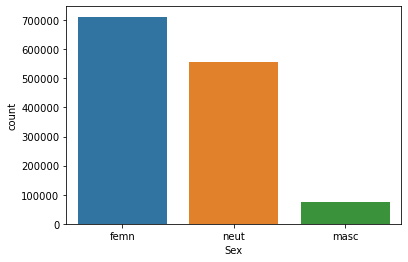

In [226]:
ax = sns.countplot(data = df, x = 'Sex')

# Финальная чистка данных 

In [227]:
# Создали копию изначальны данных
df_old = df.copy()

Следующие данные  не будут участовать в ветрине, так как не несут практической значимости для анализа : 

1. НовыйСтатус / Статус  - будем смотреть только на % отмен от всех заказов

Мы не будет включать стоимость доставки в чек, так как доставка не приносит маржу. Поэтому доставка не интересна. Только соотношение видов доставки у каждого человека.

Следующие данные относятся к доставке : 

2. ДатаДоставки	
3. ГодДатыДоставки	
4. МесяцДатыДоставки	
5. ДеньДатыДоставки	
6. СуммаУслуг / Сумма доставки
7. ПВЗ_код  


9. ЭлектроннаяПочта_new - идентифицируем по номеру телефона
10. Клиент - интересен только пол
11. ГородМагазина/Магазин заказа - вытащили информацию по городу, где было необходимо. Больше это не нужно

12. Город/Регион - есть ГЕО


In [228]:
to_delete = ['ДатаДоставки', 'ГодДатыДоставки', 'МесяцДатыДоставки', 'ДеньДатыДоставки', 'СуммаУслуг', 'ПВЗ_код', 'ЭлектроннаяПочта_new', 
            'ГородМагазина', 'Статус', 'МагазинЗаказа', 'Маржа', 'ГородМагазина', 'Регион', 'Гео']

In [229]:
df.drop(columns=to_delete, inplace=True)

In [230]:
df.sample(3)

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex
367042,5138265_TR,1 623,1 623,2017-07-16,2017,7,16,22,Курьерская,Наличная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ","ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ","варежки, перчатки",ALIAP,IDL00034370957,Нет,NaN,1,129.0,438.6,250,1,1,55575053-50525054574879,екатерина,Суббота,CENTRAL,-309.6,0,femn
597004,5211976_TR,39 732,29 194,2017-08-01,2017,8,1,12,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ПОСТЕЛЬНОЕ БЕЛЬЕ,комплекты для купания,PECORELLA,IDL00041170654,Нет,NaN,1,1450.0,312.2,99,15,1,55575048-52504848555270,ольга,Понедельник,CENTRAL,1137.8,0,femn
744803,5292800_TR,7 163,6 293,2017-08-13,2017,8,13,23,Магазины,Безналичная,МГТ,ППКП,КОСМЕТИКА/ГИГИЕНА,ТОВАРЫ ДЛЯ МАМ,одежда для мам,HOMELIKE,IDL00055306553,Нет,NaN,1,598.0,574.4,99,9,1,55574852-55535453514972,анна,Суббота,SOUTHERN,23.6,0,femn


In [231]:
# Проверяем в каких колонках null
df.isnull().any()

НомерЗаказаНаСайте            False
СуммаЗаказаНаСайте            False
СуммаДокумента                False
Дата                          False
ГодДатыЗаказа                 False
МесяцДатыЗаказа               False
ДеньДатыЗаказа                False
ЧасДатыЗаказа                 False
МетодДоставки                  True
ФормаОплаты                    True
ТипТовара                     False
Тип                           False
Группа2                       False
Группа3                       False
Группа4                        True
Номенклатура                  False
ID_SKU                        False
Отменено                      False
ПричинаОтмены                  True
Количество                    False
Цена                          False
ЦенаЗакупки                    True
СуммаДоставки                 False
НомерСтроки                   False
КоличествоПроданоКлиенту      False
Телефон_new                   False
Клиент                         True
День недели                 

# Метод доставки

In [232]:
#Метод доставки
df[df['МетодДоставки'].isna()]

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex
551587,5197315_ES,1 101,1 101,2017-07-27,2017,7,27,23,NaN,NaN,МГТ,ППКП,КОСМЕТИКА/ГИГИЕНА,СРЕДСТВА БЫТОВОЙ ХИМИИ,средства для мытья посуды,СРЕДСТВО,ID000sn-7709048,Да,5.3 Другое,4,89.0,155.2,0,1,4,55574853-53555056565678,данилова,Среда,NaN,-66.2,0,femn
551588,5197315_ES,1 101,1 101,2017-07-27,2017,7,27,23,NaN,NaN,МГТ,ППКП,КОСМЕТИКА/ГИГИЕНА,СРЕДСТВА БЫТОВОЙ ХИМИИ,порошки,Я РОДИЛСЯ,IDL00021942553,Да,5.3 Другое,1,535.0,332.1,0,2,1,55574853-53555056565678,данилова,Среда,NaN,202.9,0,femn
551589,5197315_ES,1 101,1 101,2017-07-27,2017,7,27,23,NaN,NaN,МГТ,ППКП,КОСМЕТИКА/ГИГИЕНА,СРЕДСТВА БЫТОВОЙ ХИМИИ,кондиционеры для белья,Я РОДИЛСЯ,IDL00021943452,Да,5.3 Другое,1,210.0,151.7,0,3,1,55574853-53555056565678,данилова,Среда,NaN,58.3,0,femn


Всего 3 неизвестных значений -> поставим наиболее встречающееся знаечние для того, чтобы не созавать новую категорию.


In [233]:
#Самое распространенное значение : 
most_popular_delivery_method = df['МетодДоставки'].mode().values[0]
most_popular_delivery_method

'Магазины'

In [234]:
mask = df['МетодДоставки'].isna()
df.loc[mask, 'МетодДоставки'] =  most_popular_delivery_method

In [235]:
#Проверка, что больше нет нулевых значений
df[df['МетодДоставки'].isna()]

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex


# Форма Оплаты

In [236]:
df[df['ФормаОплаты'].isna()]

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex
551587,5197315_ES,1 101,1 101,2017-07-27,2017,7,27,23,Магазины,NaN,МГТ,ППКП,КОСМЕТИКА/ГИГИЕНА,СРЕДСТВА БЫТОВОЙ ХИМИИ,средства для мытья посуды,СРЕДСТВО,ID000sn-7709048,Да,5.3 Другое,4,89.0,155.2,0,1,4,55574853-53555056565678,данилова,Среда,NaN,-66.2,0,femn
551588,5197315_ES,1 101,1 101,2017-07-27,2017,7,27,23,Магазины,NaN,МГТ,ППКП,КОСМЕТИКА/ГИГИЕНА,СРЕДСТВА БЫТОВОЙ ХИМИИ,порошки,Я РОДИЛСЯ,IDL00021942553,Да,5.3 Другое,1,535.0,332.1,0,2,1,55574853-53555056565678,данилова,Среда,NaN,202.9,0,femn
551589,5197315_ES,1 101,1 101,2017-07-27,2017,7,27,23,Магазины,NaN,МГТ,ППКП,КОСМЕТИКА/ГИГИЕНА,СРЕДСТВА БЫТОВОЙ ХИМИИ,кондиционеры для белья,Я РОДИЛСЯ,IDL00021943452,Да,5.3 Другое,1,210.0,151.7,0,3,1,55574853-53555056565678,данилова,Среда,NaN,58.3,0,femn


In [237]:
#Самое распространенное значение : 
most_popular= df['ФормаОплаты'].mode().values[0]
most_popular

'Безналичная'

In [238]:
mask = df['ФормаОплаты'].isna()
df.loc[mask, 'ФормаОплаты'] =  most_popular

In [239]:
#Проверка, что больше нет нулевых значений
df[df['ФормаОплаты'].isna()]

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex


# Группа4

In [240]:
df[(df['Группа4'].isna())]

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex
3571,5032339_ES,11 211,10 989,2017-07-01,2017,7,1,10,Курьерская,Наличная,МГТ,ИНОЕ,ЖЕНСКИЕ ШТУЧКИ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,NaN,UNILEVER,IDL00038471755,Нет,NaN,1,165.0,90.87,150,29,1,55574851-53545157514873,евгения,Пятница,CENTRAL,74.13,0,femn
15101,5034817_TR,671,623,2017-07-01,2017,7,1,17,Магазины,Безналичная,МГТ,ИНОЕ,ЖЕНСКИЕ ШТУЧКИ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,NaN,GARNIER,IDL00038503654,Нет,NaN,1,262.0,231.45,1,3,1,55574954-56485655505473-0,летникова,Пятница,CENTRAL,30.55,0,femn
54727,5045050_TR,5 711,5 711,2017-07-03,2017,7,3,2,Магазины,Безналичная,МГТ,ИНОЕ,ЖЕНСКИЕ ШТУЧКИ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,NaN,NATURA SIBERICA,IDL00038465755,Нет,NaN,1,122.0,97.61,49,18,0,55574851-49555453535072,гость,Воскресенье,CENTRAL,24.39,1,neut
54728,5045050_TR,5 711,5 711,2017-07-03,2017,7,3,2,Магазины,Безналичная,МГТ,ИНОЕ,ЖЕНСКИЕ ШТУЧКИ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,NaN,NATURA SIBERICA,IDL00038488048,Нет,NaN,1,263.0,194.41,49,17,0,55574851-49555453535072,гость,Воскресенье,CENTRAL,68.59,1,neut
56457,5689166_TR,5 286,5 167,2017-10-05,2017,10,5,21,Магазины,Безналичная,МГТ,ИНОЕ,ЖЕНСКИЕ ШТУЧКИ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,NaN,КАЛИНА,IDL00038466755,Да,4.01 Нет на остатках или нет в обработке ЗПЗ,1,45.0,28.66,49,11,1,55575054-57565048505075,юлия,Среда,CENTRAL,16.34,0,femn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325873,5965841_TR,1 640,681,2017-10-28,2017,10,28,12,Магазины,Безналичная,МГТ,ИНОЕ,ЖЕНСКИЕ ШТУЧКИ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,NaN,JOHNSON,IDL00038460149,Нет,NaN,1,139.0,105.67,49,3,1,55575453-49485552554873,гость,Пятница,CENTRAL,33.33,0,neut
1326119,5966396_TR,4 448,4 190,2017-10-28,2017,10,28,13,Курьерская,Безналичная,МГТ,ИНОЕ,ЖЕНСКИЕ ШТУЧКИ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,NaN,КАЛИНА,IDL00038461755,Нет,NaN,20,45.0,28.66,300,1,20,55575054-55565752554877,гость,Пятница,CENTRAL,16.34,0,neut
1331400,5978134_TR,743,743,2017-10-29,2017,10,29,17,Магазины,Безналичная,МГТ,ИНОЕ,ЖЕНСКИЕ ШТУЧКИ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,NaN,КОТТОН КЛАБ,IDL00038463553,Нет,NaN,1,67.0,51.91,99,5,1,55575148-50554850575574,гость,Суббота,PRIVOLZIE,15.09,0,neut
1337700,5992397_TR,2 887,2 887,2017-10-30,2017,10,30,23,Магазины,Безналичная,МГТ,ИНОЕ,ЖЕНСКИЕ ШТУЧКИ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,NaN,КОТТОН КЛАБ,IDL00038463553,Нет,NaN,1,67.0,51.91,49,5,1,55575451-55505148485577,мария,Воскресенье,CENTRAL,15.09,0,femn


У колонки *Группа 4* есть несколько (100+) строк, которые имеют нулевую группу 4, но ненулевые более крупные группы.

1. Заменим группу4 на группу3 там, где она известна


In [241]:
mask = (df['Группа4'].isna())
df.loc[mask, 'Группа4'] = df.loc[mask, 'Группа3']

In [242]:
#Больше нулевой группы4 у недоставки нет.
df[(df['Группа4'].isna())]

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex


# ЦенаЗакупки

In [243]:
df[df['ЦенаЗакупки'].isna()]

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex
303182,5196287_TR,5 860,5 743,2017-07-27,2017,7,27,17,Магазины,Безналичная,МГТ,ППКП,КОСМЕТИКА/ГИГИЕНА,ТОВАРЫ ДЛЯ МАМ,аксессуары для мам,РЕКИТТ-БЕНКИЗЕР,IDL00038493553,Нет,NaN,1,2774.0,NaN,99,11,1,55574848-57485555545170,юлия,Среда,CENTRAL,NaN,0,femn
320409,5118839_TR,4 032,4 032,2017-07-13,2017,7,13,13,Магазины,Безналичная,МГТ,ИНОЕ,ЖЕНСКИЕ ШТУЧКИ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,GARNIER,IDL00038504048,Нет,NaN,1,174.0,NaN,49,8,1,55574954-48524857575071,алексей,Среда,CENTRAL,NaN,0,masc
470732,5168002_TR,3 689,3 689,2017-07-21,2017,7,21,19,Магазины,Безналичная,МГТ,ИНОЕ,ЖЕНСКИЕ ШТУЧКИ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,БАБУШКА АГАФЬЯ,IDL00038466452,Нет,NaN,1,155.0,NaN,99,2,1,55575057-52565350505074,агата,Четверг,SIBERIA,NaN,0,femn
506557,5182079_TR,1 560,1 560,2017-07-24,2017,7,24,20,Магазины,Безналичная,МГТ,ИНОЕ,ЖЕНСКИЕ ШТУЧКИ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,КАЛИНА,IDL00038468250,Нет,NaN,1,148.0,NaN,99,2,1,55575349-48575656564875,гость,Воскресенье,PRIVOLZIE,NaN,0,neut
590609,5977212_TR,4 046,4 046,2017-10-29,2017,10,29,16,Курьерская,Наличная,МГТ,ИНОЕ,ЖЕНСКИЕ ШТУЧКИ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,ХОЗЯЮШКА,IDL00038455250,Нет,NaN,1,31.0,NaN,150,11,1,55575456-54544957555072,марина,Суббота,CENTRAL,NaN,0,femn
705850,5662001_TR,2 744,2 571,2017-10-03,2017,10,3,20,Курьерская,Наличная,МГТ,ИНОЕ,ЖЕНСКИЕ ШТУЧКИ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,JOHNSON,IDL00038469149,Нет,NaN,1,144.0,NaN,150,10,1,55575653-49565651564870,гость,Понедельник,CENTRAL,NaN,0,neut
735100,5882182_TR,7 864,99,2017-10-21,2017,10,21,10,Магазины,Безналичная,МГТ,ИНОЕ,ЖЕНСКИЕ ШТУЧКИ,ГАЛАНТЕРЕЯ,кошельки,ЖЕНСКИЕ ШТУЧКИ,IDL00050239250,Да,1.5 Письмо об отмене,1,899.0,NaN,99,7,1,55575051-52535248545176,татьяна,Пятница,SIBERIA,NaN,0,femn
735110,5882266_TR,7 990,8 270,2017-10-21,2017,10,21,10,Магазины,Безналичная,МГТ,ИНОЕ,ЖЕНСКИЕ ШТУЧКИ,ГАЛАНТЕРЕЯ,кошельки,ЖЕНСКИЕ ШТУЧКИ,IDL00050239250,Нет,NaN,1,899.0,NaN,99,3,1,55575051-52535248545176,татьяна,Пятница,SIBERIA,NaN,0,femn
743447,5291735_TR,1 149,1 149,2017-08-13,2017,8,13,20,Магазины,Безналичная,МГТ,ИНОЕ,ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТЕХНИКА ДЛЯ КУХНИ,кофеварки,MOULINEX,IDL00049645351,Нет,NaN,1,1050.0,NaN,99,1,1,55574853-48525649505371,гость,Суббота,CENTRAL,NaN,0,neut
877740,5385227_TR,383,383,2017-08-26,2017,8,26,13,Магазины,Безналичная,МГТ,ИНОЕ,ЖЕНСКИЕ ШТУЧКИ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,КАЛИНА,IDL00038462957,Нет,NaN,4,71.0,NaN,99,1,4,55574851-55495355485670,гость,Пятница,CENTRAL,NaN,0,neut


Проставим цену закупки такую же, как и цену, чтобы не потерять записи. Таким образом маржаReal будет равняться 0

In [244]:
mask = (df['ЦенаЗакупки'].isna())
df.loc[mask, 'ЦенаЗакупки'] = df.loc[mask, 'Цена']
df.loc[mask, 'МаржаReal'] = 0

In [245]:
df[(df['ЦенаЗакупки'].isna()) ]

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex


In [246]:
df.isnull().any()

НомерЗаказаНаСайте            False
СуммаЗаказаНаСайте            False
СуммаДокумента                False
Дата                          False
ГодДатыЗаказа                 False
МесяцДатыЗаказа               False
ДеньДатыЗаказа                False
ЧасДатыЗаказа                 False
МетодДоставки                 False
ФормаОплаты                   False
ТипТовара                     False
Тип                           False
Группа2                       False
Группа3                       False
Группа4                       False
Номенклатура                  False
ID_SKU                        False
Отменено                      False
ПричинаОтмены                  True
Количество                    False
Цена                          False
ЦенаЗакупки                   False
СуммаДоставки                 False
НомерСтроки                   False
КоличествоПроданоКлиенту      False
Телефон_new                   False
Клиент                         True
День недели                 

Не осталось нулевых значений, необходимых для дальнейшего анализа! Сохраним очищенные данные в csv

In [247]:
df.to_csv('clean_data.csv', index = False, encoding='utf-8')
df_old.to_csv('clean_old_data.csv', index = False)

In [248]:
df.sample(5)

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex
214714,5113623_TR,1 305,1 305,2017-07-12,2017,7,12,20,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (7-16 лет),футболки,LEADER KIDS,IDL00033444452,Нет,NaN,1,209.0,193.60,99,2,0,55574851-54554951485176,гость,Вторник,CENTRAL,15.40,1,neut
1057510,5523959_TR,34 394,33 895,2017-09-19,2017,9,19,21,Курьерская,Наличная,МГТ,ППКП,КОСМЕТИКА/ГИГИЕНА,ДЕТСКАЯ КОСМЕТИКА,мыло,НАША МАМА,ID000sm-9862856,Нет,NaN,1,101.0,91.72,150,9,1,55574854-55525555495772,гость,Понедельник,CENTRAL,9.28,0,neut
982231,5447271_TR,6 176,3 532,2017-09-09,2017,9,9,16,Магазины,Безналичная,КГТ,КГТ,КРУПНОГАБАРИТНЫЙ ТОВАР,"КОРЗИНЫ, ЯЩИКИ ДЛЯ ИГРУШЕК",корзины для игрушек,БОНИ,ID000sn-3355957,Да,2.1 Не устроила дата доставки,1,565.0,362.30,49,9,1,55575455-48555350515572,гость,Пятница,CENTRAL,202.70,0,neut
360215,5136040_TR,4 956,4 956,2017-07-16,2017,7,16,12,Магазины,Безналичная,МГТ,ППКП,КОСМЕТИКА/ГИГИЕНА,СРЕДСТВА ГИГИЕНЫ,салфетки,ДЖОНСОНС,ID10010299250,Нет,NaN,1,206.0,128.30,49,5,1,55574954-57485255554874,гость,Суббота,CENTRAL,77.70,0,neut
220862,5088074_TR,2 048,2 048,2017-09-07,2017,9,7,19,Магазины,Безналичная,МГТ,ИГРУШКИ,ИГРУШКИ,АКТИВНЫЙ ОТДЫХ,принадлежности для плавания,FREDS,ID9010019175452,Да,"1.4 Ошибка выбора, будет новый заказ",1,1999.0,456.90,49,1,1,55575054-52555756565179,гость,Среда,CENTRAL,1542.10,0,neut


In [249]:
#Количество
mask = ((df['Количество'] != df['КоличествоНеПроданоКлиенту'] + df['КоличествоПроданоКлиенту']) & (df['Количество'] == 0))
df.loc[mask, 'КоличествоНеПроданоКлиенту'] = df.loc[mask, 'КоличествоПроданоКлиенту']
df.loc[mask, 'КоличествоПроданоКлиенту'] = 0
df.loc[mask, 'Количество'] = df.loc[mask, 'КоличествоНеПроданоКлиенту']

In [250]:
df[(df['Количество'] != df['КоличествоНеПроданоКлиенту'] + df['КоличествоПроданоКлиенту'])]

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex


# Отмены. % заказов, которые были отменены у человека.

Рассматриваем сколько товаров из чека человек не выкупил

In [251]:
df[df['СуммаДокумента'] != df['СуммаЗаказаНаСайте']]['НомерЗаказаНаСайте'].unique()[:10]

array(['5134889_TR', '5134943_TR', '5147345_TR', '5427626_TR',
       '5630663_TR', '5031879_TR', '5412928_TR', '5031812_TR',
       '5031826_TR', '5340237_TR'], dtype=object)

In [252]:
df[df['НомерЗаказаНаСайте'] == '5031812_TR']

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex
195,5031812_TR,4 565,4 505,2017-07-01,2017,7,1,0,Магазины,Безналичная,МГТ,ОДЕЖДА,ОБУВЬ,СОПУТСТВУЮЩИЕ ТОВАРЫ ДЛЯ ОБУВИ,дождевики,TWINS,IDL00003464351,Нет,NaN,1,399.0,199.9,49,1,1,55575054-51545355534879,ксения,Пятница,CENTRAL,199.1,0,femn
196,5031812_TR,4 565,4 505,2017-07-01,2017,7,1,0,Магазины,Безналичная,МГТ,ППКП,КОСМЕТИКА/ГИГИЕНА,СРЕДСТВА БЫТОВОЙ ХИМИИ,средства для мытья посуды,BIOMIO,IDL00008689856,Нет,NaN,1,118.0,155.2,49,9,1,55575054-51545355534879,ксения,Пятница,CENTRAL,-37.2,0,femn
197,5031812_TR,4 565,4 505,2017-07-01,2017,7,1,0,Магазины,Безналичная,МГТ,ППКП,КОСМЕТИКА/ГИГИЕНА,СРЕДСТВА БЫТОВОЙ ХИМИИ,кондиционеры для белья,УШАСТЫЙ НЯНЬ,ID65178957,Нет,NaN,1,71.0,151.7,49,8,1,55575054-51545355534879,ксения,Пятница,CENTRAL,-80.7,0,femn
198,5031812_TR,4 565,4 505,2017-07-01,2017,7,1,0,Магазины,Безналичная,МГТ,ППКП,ПОДГУЗНИКИ,ПОДГУЗНИКИ,трусики-подгузники,ЛИБЕРО,ID10012046149,Нет,NaN,1,326.0,1029.1,49,5,1,55575054-51545355534879,ксения,Пятница,CENTRAL,-703.1,0,femn
199,5031812_TR,4 565,4 505,2017-07-01,2017,7,1,0,Магазины,Безналичная,МГТ,ППКП,ПОДГУЗНИКИ,ПОДГУЗНИКИ,трусики-подгузники,ЛИБЕРО,ID9010017491654,Нет,NaN,1,900.0,1029.1,49,3,1,55575054-51545355534879,ксения,Пятница,CENTRAL,-129.1,0,femn
200,5031812_TR,4 565,4 505,2017-07-01,2017,7,1,0,Магазины,Безналичная,МГТ,ППКП,КОСМЕТИКА/ГИГИЕНА,ДЕТСКАЯ КОСМЕТИКА,зубная паста,ДРАКОША,ID10001543149,Да,4.04 Не пришел товар от поставщика,1,60.0,109.7,49,4,1,55575054-51545355534879,ксения,Пятница,CENTRAL,-49.7,0,femn
201,5031812_TR,4 565,4 505,2017-07-01,2017,7,1,0,Магазины,Безналичная,МГТ,ППКП,КОСМЕТИКА/ГИГИЕНА,СРЕДСТВА БЫТОВОЙ ХИМИИ,отбеливатели,УШАСТЫЙ НЯНЬ,ID000sn-0077755,Нет,NaN,1,99.0,120.9,49,7,1,55575054-51545355534879,ксения,Пятница,CENTRAL,-21.9,0,femn
202,5031812_TR,4 565,4 505,2017-07-01,2017,7,1,0,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (7-16 лет),футболки,LEADER KIDS,IDL00033407957,Нет,NaN,1,153.3,193.6,49,12,1,55575054-51545355534879,ксения,Пятница,CENTRAL,-40.3,0,femn
203,5031812_TR,4 565,4 505,2017-07-01,2017,7,1,0,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (7-16 лет),футболки,LEADER KIDS,IDL00033415149,Нет,NaN,1,230.3,193.6,49,18,1,55575054-51545355534879,ксения,Пятница,CENTRAL,36.7,0,femn
204,5031812_TR,4 565,4 505,2017-07-01,2017,7,1,0,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (7-16 лет),футболки,LEADER KIDS,IDL00033417351,Нет,NaN,1,166.5,193.6,49,15,1,55575054-51545355534879,ксения,Пятница,CENTRAL,-27.1,0,femn


1 товар с индексом 200 был отменен, однако количество продано клиенту у данного товара = 1, что есть противоречние.

Этот факт учтен в "Сумма Документа" = 4505 = 4516(весь заказ) - 60(товар, который отменен) + 49(доставка).

Проставим количество продано клиенту = 0 тем товарам, которые были отменены заказчиком ( аналогично увеличим на 1 кол-во не проданного)

In [253]:
#Ищем заказы, в которых есть отмены товаров
mask_cancel = df['Отменено'] == 'Да'
df[mask_cancel]['НомерЗаказаНаСайте'].unique()[:10]

array(['5134889_TR', '5134943_TR', '5147345_TR', '5427626_TR',
       '5630663_TR', '5031879_TR', '5412928_TR', '5031812_TR',
       '5031826_TR', '5340237_TR'], dtype=object)

In [254]:
df[mask_cancel].sample(5)

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex
626717,5224900_TR,3 042,2 514,2017-08-03,2017,8,3,12,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (7-16 лет),леггинсы,FUN TIME,IDL00025552250,Да,4.04 Не пришел товар от поставщика,1,299.0,178.6,49,8,1,55575057-53574855555173,гость,Среда,CENTRAL,120.4,0,neut
760693,5304068_TR,9 007,150,2017-08-15,2017,8,15,15,Курьерская,Наличная,МГТ,ППКП,КОСМЕТИКА/ГИГИЕНА,СРЕДСТВА БЫТОВОЙ ХИМИИ,кондиционеры для белья,AQA BABY,ID9010024241856,Да,1.3 Не верные контактные данные или нет связи ...,1,143.0,151.7,150,5,1,55575053-53484849485775,дарья,Понедельник,CENTRAL,-8.7,0,femn
1138094,5904150_TR,3 609,99,2017-10-23,2017,10,23,14,Магазины,Безналичная,МГТ,ИГРУШКИ,ИГРУШКИ,ИГРУШКИ ДЛЯ МАЛЬЧИКОВ,транспорт прочий,ИГРУША,IDL00011037452,Да,1.5 Письмо об отмене,1,99.0,389.0,99,9,0,55574853-57485748525271,наталья,Воскресенье,SIBERIA,-290.0,1,femn
89141,5198108_TR,2 001,99,2017-07-28,2017,7,28,16,Магазины,Безналичная,МГТ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ФОТОАЛЬБОМЫ/ФОТОРАМКИ,фоторамки,РАМКА-вкладыш,ID000sn-4589452,Да,1.5 Письмо об отмене,1,165.0,422.4,99,6,1,55574850-54525248525073,мария,Четверг,PRIVOLZIE,-257.4,0,femn
871540,5380433_TR,4 011,49,2017-08-25,2017,8,25,17,Магазины,Безналичная,МГТ,ИГРУШКИ,ИГРУШКИ,КОНСТРУКТОРЫ,конструкторы - тип Лего,LEGO,IDL00058170250,Да,4.02 Нет основных позиций заказа,3,129.0,1123.7,49,4,0,55574953-50485752565473,гость,Четверг,CENTRAL,-994.7,3,neut


In [255]:
#Примеры, когда была частичная отмена заказа ( т.е. было заказано 10 носок. 6 взяли, 4 оставили)
df[(df['КоличествоНеПроданоКлиенту'] > 0) & (df['Отменено'] == 'Да') & (df['КоличествоПроданоКлиенту'] > 0)]

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex
81256,5051957_TR,648,49,2017-07-03,2017,7,3,22,Магазины,Безналичная,МГТ,ППКП,ДЕТСКОЕ ПИТАНИЕ,ПЮРЕ,пюре фруктовые,ХАЙНЦ,ID9010019033048,Да,"1.4 Ошибка выбора, будет новый заказ",8,33.0,41.0,49,1,4,55575054-50555355494875,гость,Воскресенье,CENTRAL,-8.0,4,neut
99396,5056898_TR,4 963,1 687,2017-07-04,2017,7,4,16,Магазины,Безналичная,МГТ,ИГРУШКИ,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,наборы игровые,MY LITTLE PONY,IDL00037760452,Да,4.01 Нет на остатках или нет в обработке ЗПЗ,4,819.0,859.6,49,2,2,55575054-54505657555077,гость,Понедельник,CENTRAL,-40.6,2,neut
273324,5104779_TR,8 608,99,2017-07-11,2017,7,11,20,Магазины,Безналичная,МГТ,ППКП,КОСМЕТИКА/ГИГИЕНА,СРЕДСТВА ГИГИЕНЫ,салфетки,CAREFREE,ID000sm-3561856,Да,"1.4 Ошибка выбора, будет новый заказ",2,101.0,128.3,99,10,1,55574953-49514853485570,гость,Понедельник,CENTRAL,-27.3,1,neut
641703,5232801_TR,25 843,149,2017-08-04,2017,8,4,17,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,комбинезоны,TAIKA,IDL00035580553,Да,5.3 Другое,3,3799.0,1569.5,149,3,2,55574852-52525254514870,гость,Четверг,SOUTHERN,2229.5,1,neut
641704,5232801_TR,25 843,149,2017-08-04,2017,8,4,17,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,комбинезоны,TAIKA,IDL00035580654,Да,5.3 Другое,3,3799.0,1569.5,149,6,2,55574852-52525254514870,гость,Четверг,SOUTHERN,2229.5,1,neut
889751,5392340_TR,1 562,49,2017-08-28,2017,8,28,16,Магазины,Безналичная,МГТ,ППКП,ДЕТСКОЕ ПИТАНИЕ,ЗАМЕНИТЕЛИ МОЛОКА,ЗАМЕНИТЕЛИ МОЛОКА,НАН 1,ID10020155250,Да,1.5 Письмо об отмене,2,675.0,685.6,49,1,1,55575054-54494855495679,анна,Воскресенье,CENTRAL,-10.6,1,femn
959424,5433489_TR,10 833,99,2017-09-06,2017,9,6,16,Магазины,Безналичная,МГТ,ИГРУШКИ,ИГРУШКИ,КОНСТРУКТОРЫ,конструкторы - тип Лего,LEGO Classic,IDL00041175957,Да,"1.4 Ошибка выбора, будет новый заказ",11,199.0,1123.7,99,6,5,55574853-53545455555577,виктория,Вторник,CENTRAL,-924.7,6,femn
973292,5440983_TR,3 135,150,2017-07-09,2017,7,9,23,Курьерская,Наличная,МГТ,ППКП,ПОДГУЗНИКИ,ПОДГУЗНИКИ,подгузники,МУНИ,ID000sm-4475048,Да,"1.4 Ошибка выбора, будет новый заказ",2,995.0,948.0,150,2,1,55575054-51485250545472,гость,Суббота,CENTRAL,47.0,1,neut
1331976,5979603_TR,586,49,2017-10-29,2017,10,29,19,Магазины,Безналичная,МГТ,ППКП,ДЕТСКОЕ ПИТАНИЕ,НАПИТКИ,соки,ФРУТОНЯНЯ,IDL00021311856,Да,4.02 Нет основных позиций заказа,15,17.0,27.5,49,4,5,55575456-53485250565076,гость,Суббота,CENTRAL,-10.5,10,neut


In [256]:
indexes = df[(df['КоличествоНеПроданоКлиенту'] > 0) & (df['Отменено'] == 'Да') & (df['КоличествоПроданоКлиенту'] > 0)].index

In [257]:
#Весь заказ отменен
df[df['НомерЗаказаНаСайте'] == '5031862_TR']

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex
622,5031862_TR,2 048,2 048,2017-07-01,2017,7,1,10,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,ветровки,FUN TIME,IDL00041768452,Да,1.5 Письмо об отмене,1,1999.0,990.26,49,1,1,55574954-54535148555079,ольга,Пятница,CENTRAL,1008.74,0,femn


В заказе *5031862_TR* только 1 товар, который был отменен. Тем не менее Сумма документа = 2048, и количество продано клиенту тоже равно 1, что неверно.

In [258]:
df[df['НомерЗаказаНаСайте'] == '5031845_TR']

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex
504,5031845_TR,4 865,4 865,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),платья,LEADER KIDS,IDL00036575452,Да,3.4 Не устроило отсутствие бонусов или скидок,1,399.0,417.7,49,5,1,55575053-48534955555274,карина,Пятница,CENTRAL,-18.7,0,femn
505,5031845_TR,4 865,4 865,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),платья,LEADER KIDS,IDL00037172452,Да,3.4 Не устроило отсутствие бонусов или скидок,1,799.0,417.7,49,11,1,55575053-48534955555274,карина,Пятница,CENTRAL,381.3,0,femn
506,5031845_TR,4 865,4 865,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),шорты,FUN TIME,IDL00039225250,Да,3.4 Не устроило отсутствие бонусов или скидок,1,379.0,229.3,49,4,1,55575053-48534955555274,карина,Пятница,CENTRAL,149.7,0,femn
507,5031845_TR,4 865,4 865,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),брюки,FUN TIME,IDL00039276351,Да,3.4 Не устроило отсутствие бонусов или скидок,1,439.0,550.4,49,13,1,55575053-48534955555274,карина,Пятница,CENTRAL,-111.4,0,femn
508,5031845_TR,4 865,4 865,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),комплекты,FUN TIME,IDL00039399452,Да,3.4 Не устроило отсутствие бонусов или скидок,1,499.0,2006.5,49,7,1,55575053-48534955555274,карина,Пятница,CENTRAL,-1507.5,0,femn
509,5031845_TR,4 865,4 865,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),леггинсы,BONY KIDS,IDL00039414856,Да,3.4 Не устроило отсутствие бонусов или скидок,1,239.0,178.6,49,9,1,55575053-48534955555274,карина,Пятница,CENTRAL,60.4,0,femn
510,5031845_TR,4 865,4 865,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКОЕ БЕЛЬЁ,комплекты (майка+трусы),TIGER,IDL00046025048,Да,3.4 Не устроило отсутствие бонусов или скидок,1,339.0,215.0,49,3,1,55575053-48534955555274,карина,Пятница,CENTRAL,124.0,0,femn
511,5031845_TR,4 865,4 865,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКОЕ БЕЛЬЁ,комплекты (майка+трусы),TIGER,IDL00046025250,Да,3.4 Не устроило отсутствие бонусов или скидок,1,339.0,215.0,49,14,1,55575053-48534955555274,карина,Пятница,CENTRAL,124.0,0,femn
512,5031845_TR,4 865,4 865,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),юбки,МАМУЛЯНДИЯ,IDL00049475553,Да,3.4 Не устроило отсутствие бонусов или скидок,1,459.0,368.8,49,10,1,55575053-48534955555274,карина,Пятница,CENTRAL,90.2,0,femn
513,5031845_TR,4 865,4 865,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),футболки,ЗВЕЗДОЧКА,IDL00009648856,Да,3.4 Не устроило отсутствие бонусов или скидок,1,109.0,193.6,49,1,1,55575053-48534955555274,карина,Пятница,CENTRAL,-84.6,0,femn


Выше пример, когда все товары отменены, но Сумма документа != 0. 


Видимо реальную сумму(без доставки), которую оплатил человек, придется расчитывать самостоятельно.

In [259]:
#Частичная отмена заказа (часть товаров отменяли полностью, часть - нет)
df[df['НомерЗаказаНаСайте'] == '5031855_TR']

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex
590,5031855_TR,4 108,"2 562,40",2017-07-01,2017,7,1,0,Курьерская,Наличная,МГТ,ОДЕЖДА,ОБУВЬ,ОБУВЬ ДЕТСКАЯ,резиновая обувь,КАУРИ,IDL00047896957,Да,Возврат товара,1,420.0,321.0,150,1,0,55575453-50545148484875,гость,Пятница,CENTRAL,99.0,1,neut
591,5031855_TR,4 108,"2 562,40",2017-07-01,2017,7,1,0,Курьерская,Наличная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),джемпера,FUN TIME,IDL00039964553,Нет,NaN,1,265.3,308.6,150,7,1,55575453-50545148484875,гость,Пятница,CENTRAL,-43.3,0,neut
592,5031855_TR,4 108,"2 562,40",2017-07-01,2017,7,1,0,Курьерская,Наличная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),комплекты,FUN TIME,IDL00040187048,Да,Возврат товара,2,293.3,2006.5,150,3,0,55575453-50545148484875,гость,Пятница,CENTRAL,-1713.2,2,neut
593,5031855_TR,4 108,"2 562,40",2017-07-01,2017,7,1,0,Курьерская,Наличная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),комплекты,FUN TIME,IDL00040187149,Нет,NaN,1,300.3,2006.5,150,8,1,55575453-50545148484875,гость,Пятница,CENTRAL,-1706.2,0,neut
594,5031855_TR,4 108,"2 562,40",2017-07-01,2017,7,1,0,Курьерская,Наличная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),футболки,FUN TIME,IDL00042142250,Нет,NaN,1,160.3,193.6,150,2,1,55575453-50545148484875,гость,Пятница,CENTRAL,-33.3,0,neut
595,5031855_TR,4 108,"2 562,40",2017-07-01,2017,7,1,0,Курьерская,Наличная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),футболки,LUCKY CHILD,IDL00017086149,Нет,NaN,1,359.0,193.6,150,5,1,55575453-50545148484875,гость,Пятница,CENTRAL,165.4,0,neut
596,5031855_TR,4 108,"2 562,40",2017-07-01,2017,7,1,0,Курьерская,Наличная,МГТ,ИГРУШКИ,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУША,IDL00023053957,Да,Возврат товара,1,199.0,146.9,150,11,0,55575453-50545148484875,гость,Пятница,CENTRAL,52.1,1,neut
597,5031855_TR,4 108,"2 562,40",2017-07-01,2017,7,1,0,Курьерская,Наличная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),джемпера,CORNETTE,IDL00021485856,Нет,NaN,1,229.5,308.6,150,4,1,55575453-50545148484875,гость,Пятница,CENTRAL,-79.1,0,neut
598,5031855_TR,4 108,"2 562,40",2017-07-01,2017,7,1,0,Курьерская,Наличная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),джемпера,GROWUP,IDL00031284250,Нет,NaN,1,599.0,308.6,150,6,1,55575453-50545148484875,гость,Пятница,CENTRAL,290.4,0,neut
599,5031855_TR,4 108,"2 562,40",2017-07-01,2017,7,1,0,Курьерская,Наличная,МГТ,ИГРУШКИ,ИГРУШКИ,ИГРУШКИ ДЛЯ МАЛЬЧИКОВ,модели инерционные и фрикционные,ИГРУША,IDL00035680149,Да,Возврат товара,1,299.0,236.5,150,12,0,55575453-50545148484875,гость,Пятница,CENTRAL,62.5,1,neut


In [260]:
mask_cancel = (mask_cancel) & (~df.index.isin(indexes))
df.loc[mask_cancel, 'КоличествоНеПроданоКлиенту'] = df.loc[mask_cancel, 'Количество']
df.loc[mask_cancel, 'КоличествоПроданоКлиенту'] = 0

In [261]:
df[df['НомерЗаказаНаСайте'] == '5031855_TR'][['Отменено', 'ПричинаОтмены', 'Количество', 'КоличествоПроданоКлиенту','КоличествоНеПроданоКлиенту']]

,Отменено,ПричинаОтмены,Количество,КоличествоПроданоКлиенту,КоличествоНеПроданоКлиенту
590,Да,Возврат товара,1,0,1
591,Нет,NaN,1,1,0
592,Да,Возврат товара,2,0,2
593,Нет,NaN,1,1,0
594,Нет,NaN,1,1,0
595,Нет,NaN,1,1,0
596,Да,Возврат товара,1,0,1
597,Нет,NaN,1,1,0
598,Нет,NaN,1,1,0
599,Да,Возврат товара,1,0,1


## Вычисление реальной стоимости заказа без доставки

In [262]:
def real_cost(x):
    return sum(x['Цена'] * x['КоличествоПроданоКлиенту'])

In [263]:
df[df['НомерЗаказаНаСайте'] == '5998406_TR'].groupby('НомерЗаказаНаСайте').apply(real_cost)

НомерЗаказаНаСайте
5998406_TR    19234.0
dtype: float64

In [264]:
df[df['НомерЗаказаНаСайте'] == '5998406_TR']

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex
1340579,5998406_TR,19 384,19 384,2017-10-31,2017,10,31,17,Курьерская,Наличная,МГТ,ППКП,ПОДГУЗНИКИ,ПОДГУЗНИКИ,трусики-подгузники,ГУН,ID10000511351,Нет,NaN,2,1099.0,1029.1,150,1,2,55575054-50535252535372,гость,Понедельник,CENTRAL,69.9,0,neut
1340580,5998406_TR,19 384,19 384,2017-10-31,2017,10,31,17,Курьерская,Наличная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),юбки,FUN TIME,IDL00031894755,Нет,NaN,1,719.0,368.8,150,8,1,55575054-50535252535372,гость,Понедельник,CENTRAL,350.2,0,neut
1340581,5998406_TR,19 384,19 384,2017-10-31,2017,10,31,17,Курьерская,Наличная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,полукомбинезоны,HUPPA,IDL00034862149,Нет,NaN,1,2799.0,759.5,150,2,1,55575054-50535252535372,гость,Понедельник,CENTRAL,2039.5,0,neut
1340582,5998406_TR,19 384,19 384,2017-10-31,2017,10,31,17,Курьерская,Наличная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,полукомбинезоны,SAIMA,IDL00061443452,Нет,NaN,1,1799.0,759.5,150,4,1,55575054-50535252535372,гость,Понедельник,CENTRAL,1039.5,0,neut
1340583,5998406_TR,19 384,19 384,2017-10-31,2017,10,31,17,Курьерская,Наличная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,полукомбинезоны,SAIMA,IDL00061458351,Нет,NaN,1,2223.0,759.5,150,5,1,55575054-50535252535372,гость,Понедельник,CENTRAL,1463.5,0,neut
1340584,5998406_TR,19 384,19 384,2017-10-31,2017,10,31,17,Курьерская,Наличная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,полукомбинезоны,TAIKA,IDL00057218452,Нет,NaN,1,3419.0,759.5,150,6,1,55575054-50535252535372,гость,Понедельник,CENTRAL,2659.5,0,neut
1340585,5998406_TR,19 384,19 384,2017-10-31,2017,10,31,17,Курьерская,Наличная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,полукомбинезоны,TAIKA,IDL00057218755,Нет,NaN,1,3039.0,759.5,150,7,1,55575054-50535252535372,гость,Понедельник,CENTRAL,2279.5,0,neut
1340586,5998406_TR,19 384,19 384,2017-10-31,2017,10,31,17,Курьерская,Наличная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,брюки,HUPPA,IDL00055025048,Нет,NaN,1,3038.0,550.4,150,3,1,55575054-50535252535372,гость,Понедельник,CENTRAL,2487.6,0,neut


In [265]:
df_real_cost = df.groupby('НомерЗаказаНаСайте').apply(real_cost)
df_real_cost

НомерЗаказаНаСайте
1303000416_TR    27075.0
1303000417_TR    27740.0
1303000418_TR        0.0
1303000419_TR     4465.0
1303000420_TR        0.0
                  ...   
6005065_ES           0.0
6005071_ES        3072.0
6005077_ES           0.0
6005089_ES           0.0
6005101_ES         848.0
Length: 368324, dtype: float64

In [266]:
df[df['НомерЗаказаНаСайте'] == '6005077_ES']

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex
1343644,6005077_ES,2 564,2 564,2017-10-31,2017,10,31,23,Магазины,Безналичная,МГТ,ИГРУШКИ,ИГРУШКИ,ИГРУШКИ ДЛЯ МАЛЬЧИКОВ,"треки, парковки",HOT WHEELS,IDL00043615553,Нет,NaN,1,2564.0,1251.5,0,1,0,55574857-54545754565577,дмитрий,Понедельник,CENTRAL,1312.5,1,masc


In [267]:
df = pd.merge(left=df, right=pd.DataFrame(df_real_cost), left_on='НомерЗаказаНаСайте', right_on='НомерЗаказаНаСайте' )

In [268]:
df.rename(columns={0:'Ральная_стоимость_заказа'}, inplace=True)

In [269]:
df['Ральная_стоимость_заказа'] = df['Ральная_стоимость_заказа'].astype(float)
df['СуммаДокумента'] = df['СуммаДокумента'].str.replace(" ", "").str.replace(",",".").astype(float)
df['СуммаДоставки'] = df['СуммаДоставки'].astype(float)

In [270]:
df['СуммаЗаказаНаСайте'] = df['Ральная_стоимость_заказа']
df.drop(columns=['Ральная_стоимость_заказа', 'СуммаДокумента'], inplace = True)

In [271]:
#Если товар не был куплен -> с него не было маржи
df.loc[df['КоличествоПроданоКлиенту'] == 0, 'МаржаReal'] = 0

In [272]:
indexes = df[(df['КоличествоНеПроданоКлиенту'] > 0) & (df['Отменено'] == 'Да') & (df['КоличествоПроданоКлиенту'] > 0)].index

In [273]:
#Весь заказ отменен
df[df['НомерЗаказаНаСайте'] == '5031862_TR']

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex
622,5031862_TR,0.0,2017-07-01,2017,7,1,10,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,ветровки,FUN TIME,IDL00041768452,Да,1.5 Письмо об отмене,1,1999.0,990.26,49.0,1,0,55574954-54535148555079,ольга,Пятница,CENTRAL,0.0,1,femn


В заказе *5031862_TR* только 1 товар, который был отменен. Тем не менее Сумма документа = 2048, и количество продано клиенту тоже равно 1, что неверно.

In [274]:
df[df['НомерЗаказаНаСайте'] == '5031845_TR']

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex
504,5031845_TR,0.0,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),платья,LEADER KIDS,IDL00036575452,Да,3.4 Не устроило отсутствие бонусов или скидок,1,399.0,417.7,49.0,5,0,55575053-48534955555274,карина,Пятница,CENTRAL,0.0,1,femn
505,5031845_TR,0.0,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),платья,LEADER KIDS,IDL00037172452,Да,3.4 Не устроило отсутствие бонусов или скидок,1,799.0,417.7,49.0,11,0,55575053-48534955555274,карина,Пятница,CENTRAL,0.0,1,femn
506,5031845_TR,0.0,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),шорты,FUN TIME,IDL00039225250,Да,3.4 Не устроило отсутствие бонусов или скидок,1,379.0,229.3,49.0,4,0,55575053-48534955555274,карина,Пятница,CENTRAL,0.0,1,femn
507,5031845_TR,0.0,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),брюки,FUN TIME,IDL00039276351,Да,3.4 Не устроило отсутствие бонусов или скидок,1,439.0,550.4,49.0,13,0,55575053-48534955555274,карина,Пятница,CENTRAL,0.0,1,femn
508,5031845_TR,0.0,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),комплекты,FUN TIME,IDL00039399452,Да,3.4 Не устроило отсутствие бонусов или скидок,1,499.0,2006.5,49.0,7,0,55575053-48534955555274,карина,Пятница,CENTRAL,0.0,1,femn
509,5031845_TR,0.0,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),леггинсы,BONY KIDS,IDL00039414856,Да,3.4 Не устроило отсутствие бонусов или скидок,1,239.0,178.6,49.0,9,0,55575053-48534955555274,карина,Пятница,CENTRAL,0.0,1,femn
510,5031845_TR,0.0,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКОЕ БЕЛЬЁ,комплекты (майка+трусы),TIGER,IDL00046025048,Да,3.4 Не устроило отсутствие бонусов или скидок,1,339.0,215.0,49.0,3,0,55575053-48534955555274,карина,Пятница,CENTRAL,0.0,1,femn
511,5031845_TR,0.0,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКОЕ БЕЛЬЁ,комплекты (майка+трусы),TIGER,IDL00046025250,Да,3.4 Не устроило отсутствие бонусов или скидок,1,339.0,215.0,49.0,14,0,55575053-48534955555274,карина,Пятница,CENTRAL,0.0,1,femn
512,5031845_TR,0.0,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),юбки,МАМУЛЯНДИЯ,IDL00049475553,Да,3.4 Не устроило отсутствие бонусов или скидок,1,459.0,368.8,49.0,10,0,55575053-48534955555274,карина,Пятница,CENTRAL,0.0,1,femn
513,5031845_TR,0.0,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),футболки,ЗВЕЗДОЧКА,IDL00009648856,Да,3.4 Не устроило отсутствие бонусов или скидок,1,109.0,193.6,49.0,1,0,55575053-48534955555274,карина,Пятница,CENTRAL,0.0,1,femn


В заказе *5031862_TR* только 1 товар, который был отменен. Тем не менее Сумма документа = 2048, и количество продано клиенту тоже равно 1, что неверно.

In [275]:
df[df['НомерЗаказаНаСайте'] == '5031845_TR']

,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,Дата,ГодДатыЗаказа,МесяцДатыЗаказа,ДеньДатыЗаказа,ЧасДатыЗаказа,МетодДоставки,ФормаОплаты,ТипТовара,Тип,Группа2,Группа3,Группа4,Номенклатура,ID_SKU,Отменено,ПричинаОтмены,Количество,Цена,ЦенаЗакупки,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,Клиент,День недели,Округ,МаржаReal,КоличествоНеПроданоКлиенту,Sex
504,5031845_TR,0.0,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),платья,LEADER KIDS,IDL00036575452,Да,3.4 Не устроило отсутствие бонусов или скидок,1,399.0,417.7,49.0,5,0,55575053-48534955555274,карина,Пятница,CENTRAL,0.0,1,femn
505,5031845_TR,0.0,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),платья,LEADER KIDS,IDL00037172452,Да,3.4 Не устроило отсутствие бонусов или скидок,1,799.0,417.7,49.0,11,0,55575053-48534955555274,карина,Пятница,CENTRAL,0.0,1,femn
506,5031845_TR,0.0,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),шорты,FUN TIME,IDL00039225250,Да,3.4 Не устроило отсутствие бонусов или скидок,1,379.0,229.3,49.0,4,0,55575053-48534955555274,карина,Пятница,CENTRAL,0.0,1,femn
507,5031845_TR,0.0,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),брюки,FUN TIME,IDL00039276351,Да,3.4 Не устроило отсутствие бонусов или скидок,1,439.0,550.4,49.0,13,0,55575053-48534955555274,карина,Пятница,CENTRAL,0.0,1,femn
508,5031845_TR,0.0,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),комплекты,FUN TIME,IDL00039399452,Да,3.4 Не устроило отсутствие бонусов или скидок,1,499.0,2006.5,49.0,7,0,55575053-48534955555274,карина,Пятница,CENTRAL,0.0,1,femn
509,5031845_TR,0.0,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),леггинсы,BONY KIDS,IDL00039414856,Да,3.4 Не устроило отсутствие бонусов или скидок,1,239.0,178.6,49.0,9,0,55575053-48534955555274,карина,Пятница,CENTRAL,0.0,1,femn
510,5031845_TR,0.0,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКОЕ БЕЛЬЁ,комплекты (майка+трусы),TIGER,IDL00046025048,Да,3.4 Не устроило отсутствие бонусов или скидок,1,339.0,215.0,49.0,3,0,55575053-48534955555274,карина,Пятница,CENTRAL,0.0,1,femn
511,5031845_TR,0.0,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКОЕ БЕЛЬЁ,комплекты (майка+трусы),TIGER,IDL00046025250,Да,3.4 Не устроило отсутствие бонусов или скидок,1,339.0,215.0,49.0,14,0,55575053-48534955555274,карина,Пятница,CENTRAL,0.0,1,femn
512,5031845_TR,0.0,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),юбки,МАМУЛЯНДИЯ,IDL00049475553,Да,3.4 Не устроило отсутствие бонусов или скидок,1,459.0,368.8,49.0,10,0,55575053-48534955555274,карина,Пятница,CENTRAL,0.0,1,femn
513,5031845_TR,0.0,2017-07-01,2017,7,1,9,Магазины,Безналичная,МГТ,ОДЕЖДА,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),футболки,ЗВЕЗДОЧКА,IDL00009648856,Да,3.4 Не устроило отсутствие бонусов или скидок,1,109.0,193.6,49.0,1,0,55575053-48534955555274,карина,Пятница,CENTRAL,0.0,1,femn


Выше пример, когда все товары отменены, но Сумма документа != 0. 


Видимо реальную сумму(без доставки), которую оплатил человек, придется расчитывать самостоятельно.

In [276]:
#Частичная отмена заказа (часть товаров отменяли полностью, часть - нет)
df[df['НомерЗаказаНаСайте'] == '5031855_TR'][['Отменено', 'ПричинаОтмены', 'Количество', 'КоличествоПроданоКлиенту','КоличествоНеПроданоКлиенту']]

,Отменено,ПричинаОтмены,Количество,КоличествоПроданоКлиенту,КоличествоНеПроданоКлиенту
590,Да,Возврат товара,1,0,1
591,Нет,NaN,1,1,0
592,Да,Возврат товара,2,0,2
593,Нет,NaN,1,1,0
594,Нет,NaN,1,1,0
595,Нет,NaN,1,1,0
596,Да,Возврат товара,1,0,1
597,Нет,NaN,1,1,0
598,Нет,NaN,1,1,0
599,Да,Возврат товара,1,0,1


In [277]:
#Исправление ошибки
mask_cancel = (mask_cancel) & (~df.index.isin(indexes))
df.loc[mask_cancel, 'КоличествоНеПроданоКлиенту'] = df.loc[mask_cancel, 'Количество']
df.loc[mask_cancel, 'КоличествоПроданоКлиенту'] = 0

In [278]:
df[df['НомерЗаказаНаСайте'] == '5031855_TR'][['Отменено', 'ПричинаОтмены', 'Количество', 'КоличествоПроданоКлиенту','КоличествоНеПроданоКлиенту']]

,Отменено,ПричинаОтмены,Количество,КоличествоПроданоКлиенту,КоличествоНеПроданоКлиенту
590,Да,Возврат товара,1,0,1
591,Нет,NaN,1,1,0
592,Да,Возврат товара,2,0,2
593,Нет,NaN,1,1,0
594,Нет,NaN,1,1,0
595,Нет,NaN,1,1,0
596,Да,Возврат товара,1,0,1
597,Нет,NaN,1,1,0
598,Нет,NaN,1,1,0
599,Да,Возврат товара,1,0,1


# Сохранение

In [279]:
df.to_csv('clean_data.scv')